In [3]:
from utils import *
import pymongo

In [4]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["db"]
birds = mydb["electric_scooters"]

In [5]:
def get_birds_ids(birds):
    return list(birds.distinct("id"))

In [6]:
birds_ids = get_birds_ids(birds)
print(len(birds_ids))

7642


In [7]:
def get_distance_and_moves(bird_id, birds, time):
    if time == "any":
        bird_by_id = birds.find({"id": bird_id})
    else:
        #bird_by_id = birds.find({"id": bird_id},{"time": "/2019/"})
        bird_by_id = birds.find({"$and": [{"id": bird_id}, {"time":{"$regex": u"" + time +""}}]})
    bird_by_id = list(bird_by_id)
    
    #print(len(bird_by_id))
    total_distance = 0
    used = 0
    print("----------------------------------------------------------")
    print("ID: " + bird_id)
    for i in range(len(bird_by_id) - 1):
        previous = bird_by_id[i]
        actual = bird_by_id[i + 1]
        #print(calculate_distance(previous.get("location"), actual.get("location"))
        actual_distance = calculate_distance(previous.get("location"), actual.get("location"))
        if(actual_distance > 0.001 and (int(previous.get("battery_level")) > int(actual.get("battery_level")))):
            #print(previous.get("time") + " " + previous.get("battery_level") + " " + actual.get("battery_level") +" " + str(actual_distance))
            used += 1
            total_distance += actual_distance
    return {"distance":total_distance, "used": used}

In [8]:
test_id = birds_ids[300]
get_distance_and_moves(test_id, birds, "2019")

----------------------------------------------------------
ID: bec01b21-283b-4313-909d-ac46b0e59dc3


{'distance': 0.10813570772825082, 'used': 3}

In [10]:
all_time = "any"
days = ["2019-10-29", "2019-10-30", "2019-10-31", "2019-11-01", "2019-11-02", "2019-11-03", "2019-11-04"]

In [11]:
def get_total(bird_ids, birds, time):
    total_used = 0
    total_dist = 0
    interator = 0
    bird_ids_len = len(bird_ids)
    for bird_id in bird_ids:
        interator +=1
        dist_movs = get_distance_and_moves(bird_id, birds, time)
        print("ID number : " + str(interator) + " of " + str(bird_ids_len))
        total_used += dist_movs.get("used")
        total_dist += dist_movs.get("distance")
    return {"distance":total_dist, "used": total_used}

In [10]:
#Długi czsa wykonania
#get_total(birds_ids, birds, all_time)

In [12]:
hours = [" 00:", " 01:", " 02:", " 03:", " 04:", " 05:", " 06:", " 07:", " 08:", " 09:" ," 10:", " 11:", " 12:",
        " 13:", " 14:", " 15:", " 16:", " 17:", " 18:", " 19:", " 20:", " 21:", " 22:", " 23:" ]

In [13]:
def ids_for_time(birds, time):
    if time == "any":
        return birds.distinct("id")
    else:
        return birds.find({"time":{"$regex": u"" + time +""}}).distinct("id")

In [14]:
len(ids_for_time(birds, " 03:"))

1851

In [15]:
result = list()
day = "2019-11-02"
for hour in hours:
    print("Hours: " + hour)
    ids = ids_for_time(birds, day + hour)
    print("Number of ids: " + str(len(ids)))
    result.append(get_total(ids, birds, day + hour))

Hours:  00:
Number of ids: 406
----------------------------------------------------------
ID: 91c6aac6-a364-4302-b9eb-2043564563ef
ID number : 1 of 406
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 2 of 406
----------------------------------------------------------
ID: 5b6e4c60-6afb-407b-bb26-16eb9730ca8d
ID number : 3 of 406
----------------------------------------------------------
ID: 42051c27-bb5b-45d7-88c9-e48903edacec
ID number : 4 of 406
----------------------------------------------------------
ID: b08b7619-64eb-4380-8d27-be914b7f1d40
ID number : 5 of 406
----------------------------------------------------------
ID: fde041e8-48ef-4b45-bde8-f2c6ee810a8d
ID number : 6 of 406
----------------------------------------------------------
ID: a22b9647-bfc3-4ebd-a33f-9d16cc721709
ID number : 7 of 406
----------------------------------------------------------
ID: 3c263d1b-ac61-49a6-b201-acf28ef19621
ID number : 8 of 406
-

----------------------------------------------------------
ID: 19f68c7d-d3fd-49ce-923b-f36f8d6429e4
ID number : 68 of 406
----------------------------------------------------------
ID: c47298d9-f691-4153-b05a-f2255cf3d71f
ID number : 69 of 406
----------------------------------------------------------
ID: 78f92d19-223d-400c-b765-b7e3986ea9ed
ID number : 70 of 406
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 71 of 406
----------------------------------------------------------
ID: 5f6956af-ad35-4264-97fd-2d5da932648c
ID number : 72 of 406
----------------------------------------------------------
ID: a68662bf-fbd6-427d-81d2-93f2134f0a4f
ID number : 73 of 406
----------------------------------------------------------
ID: 796ff35a-11bd-41b7-b7b9-ae8393983867
ID number : 74 of 406
----------------------------------------------------------
ID: 8a38bbf9-556d-4b19-a0ef-e262cf8d5133
ID number : 75 of 406
------------------------

----------------------------------------------------------
ID: e3d1ab8f-6911-4647-ae57-c57ffa00f762
ID number : 135 of 406
----------------------------------------------------------
ID: 447c59c4-e18e-42fa-99e6-648089697551
ID number : 136 of 406
----------------------------------------------------------
ID: 56ce9e58-3337-4746-b333-28f6ee9fd165
ID number : 137 of 406
----------------------------------------------------------
ID: 62b746ff-9310-4fd6-9ca3-1015d9267e8f
ID number : 138 of 406
----------------------------------------------------------
ID: 71c36ac2-b043-44e1-9c96-b9654fe94581
ID number : 139 of 406
----------------------------------------------------------
ID: 5d7444b5-e01b-4120-ba0f-e725623d91ba
ID number : 140 of 406
----------------------------------------------------------
ID: 2caf4aac-3017-4c07-9444-eecf8e8dceaf
ID number : 141 of 406
----------------------------------------------------------
ID: fc51704a-532c-4d6b-a331-8db4bc9a91f9
ID number : 142 of 406
----------------

----------------------------------------------------------
ID: 4fa5214f-2a32-483c-acf7-89df85877245
ID number : 202 of 406
----------------------------------------------------------
ID: c254e600-1edc-42c4-b2cc-736e5d215aea
ID number : 203 of 406
----------------------------------------------------------
ID: 4ff68cdc-e00f-45f2-9c30-3b2a8233e43b
ID number : 204 of 406
----------------------------------------------------------
ID: 0afb5f6a-f5ad-41d2-a20f-cd33e8c9be7e
ID number : 205 of 406
----------------------------------------------------------
ID: 3baf2351-6bf6-4ec0-9b65-7d376d2ba0b2
ID number : 206 of 406
----------------------------------------------------------
ID: 0204eca3-d952-49d2-a62c-8ff97a9a2d03
ID number : 207 of 406
----------------------------------------------------------
ID: 7316d3b9-d180-428a-a45a-62a12f9a2982
ID number : 208 of 406
----------------------------------------------------------
ID: bd14bcbf-c572-4994-9578-33234f13c3a4
ID number : 209 of 406
----------------

----------------------------------------------------------
ID: f90466a3-fb72-4d03-a94a-220c32d8d6c6
ID number : 269 of 406
----------------------------------------------------------
ID: bf67abb9-1cb7-47cb-88b2-df38b16ec91e
ID number : 270 of 406
----------------------------------------------------------
ID: 9a8c24fb-8640-4eea-a8b0-20d0f93b8b39
ID number : 271 of 406
----------------------------------------------------------
ID: 93687911-5489-4cda-8116-6b5e41aa097b
ID number : 272 of 406
----------------------------------------------------------
ID: c61eae4e-4da9-4e6c-8d0e-5382a7092631
ID number : 273 of 406
----------------------------------------------------------
ID: 309fc1fb-ffbb-4b1f-bca2-6aa7b8f738d2
ID number : 274 of 406
----------------------------------------------------------
ID: b3bfc9e3-f87e-42b3-8ac7-b52504f6b5f7
ID number : 275 of 406
----------------------------------------------------------
ID: 17ca5b3f-042a-46ec-b3cd-fa6f8fcc5ede
ID number : 276 of 406
----------------

----------------------------------------------------------
ID: fbdbd94f-547c-4f3f-9947-f0809a1cf7c7
ID number : 336 of 406
----------------------------------------------------------
ID: 74a5014a-8e71-4e62-bba0-4f2cf1075574
ID number : 337 of 406
----------------------------------------------------------
ID: 3171c9ed-b587-46b7-959d-f9283426d42f
ID number : 338 of 406
----------------------------------------------------------
ID: 4e734517-d3ea-40f2-8a34-6abd36454a36
ID number : 339 of 406
----------------------------------------------------------
ID: 547032d2-43c9-467a-96e3-e1aaa5718820
ID number : 340 of 406
----------------------------------------------------------
ID: 64e1e88f-18fc-47ce-9823-709f33822c07
ID number : 341 of 406
----------------------------------------------------------
ID: e2fcc9f9-b616-4b4b-9821-f938948dc5f3
ID number : 342 of 406
----------------------------------------------------------
ID: d2ae3e14-27ee-4220-a82d-eab9759cab19
ID number : 343 of 406
----------------

----------------------------------------------------------
ID: daacdba3-2238-422f-93c8-51d2bfb78721
ID number : 403 of 406
----------------------------------------------------------
ID: bfe0afa5-2e4b-48bc-a295-0c6e4b73f305
ID number : 404 of 406
----------------------------------------------------------
ID: 2adfb1d9-ddf3-482c-be27-b5c090259327
ID number : 405 of 406
----------------------------------------------------------
ID: 7c8a9fa4-8245-42fa-a6e4-325ac3cd4081
ID number : 406 of 406
Hours:  01:
Number of ids: 384
----------------------------------------------------------
ID: 3f5e22d1-cc00-4c1d-8b60-aed5c3747748
ID number : 1 of 384
----------------------------------------------------------
ID: 7a8427dc-b211-4baa-8001-f80cfa386262
ID number : 2 of 384
----------------------------------------------------------
ID: e84bc203-7e87-46ee-aa45-7704866a16d1
ID number : 3 of 384
----------------------------------------------------------
ID: e2e4f990-1074-48a2-bb7f-3d836e61a216
ID number : 4 

----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
ID number : 64 of 384
----------------------------------------------------------
ID: 8187e996-aba2-42a5-80b3-53779d31646a
ID number : 65 of 384
----------------------------------------------------------
ID: 401cd60c-080a-4df2-aa8a-81879d0206a6
ID number : 66 of 384
----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 67 of 384
----------------------------------------------------------
ID: 4e65a95c-b4ab-48a6-b11d-5b0a2777d685
ID number : 68 of 384
----------------------------------------------------------
ID: ef290cdc-2d74-44b7-88b5-52aff4410b07
ID number : 69 of 384
----------------------------------------------------------
ID: cbd1a0b7-0d8d-4733-98b5-67175915d64e
ID number : 70 of 384
----------------------------------------------------------
ID: 26fc42e7-011a-4977-b7c9-8a2b797d2165
ID number : 71 of 384
------------------------

----------------------------------------------------------
ID: f04a66b6-cd5d-4c5a-b4be-a4076cbfce6a
ID number : 131 of 384
----------------------------------------------------------
ID: 0ada081d-d2b9-442f-9dcb-f31d7bfed40e
ID number : 132 of 384
----------------------------------------------------------
ID: 4b654c10-621e-424c-9efc-eac6dcdd715b
ID number : 133 of 384
----------------------------------------------------------
ID: bb4cc3bf-3a08-48e5-9564-14653ca1ef80
ID number : 134 of 384
----------------------------------------------------------
ID: 3be6f4d8-27be-4337-89e7-ed2bc9af9f3d
ID number : 135 of 384
----------------------------------------------------------
ID: 8ff2bd37-45e4-4b72-9c18-7b1433e0b87b
ID number : 136 of 384
----------------------------------------------------------
ID: 18fd1475-7d7a-47d2-b5a8-77d5b20e79ef
ID number : 137 of 384
----------------------------------------------------------
ID: 4ff68cdc-e00f-45f2-9c30-3b2a8233e43b
ID number : 138 of 384
----------------

----------------------------------------------------------
ID: 989bf30c-3dfa-4c05-928b-af821f256499
ID number : 198 of 384
----------------------------------------------------------
ID: 990f26f7-26e7-443b-ba6a-db81b80d7e44
ID number : 199 of 384
----------------------------------------------------------
ID: 25123bd9-0026-447c-9bd2-11a52c71a592
ID number : 200 of 384
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 201 of 384
----------------------------------------------------------
ID: 80de16c6-6b17-46e1-b056-ef8408381b00
ID number : 202 of 384
----------------------------------------------------------
ID: 5dba5aa2-101f-4221-bb76-e51f77ac9c7d
ID number : 203 of 384
----------------------------------------------------------
ID: faa039cb-efda-4541-8a73-3098ef5d8d0e
ID number : 204 of 384
----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 205 of 384
----------------

----------------------------------------------------------
ID: b1017bc5-5999-4dc6-97ea-00eabd519b24
ID number : 265 of 384
----------------------------------------------------------
ID: aaf2fa99-e3a9-4130-bf56-5b21deee203b
ID number : 266 of 384
----------------------------------------------------------
ID: 8f11f9d5-afd7-4a2e-8b9c-5260e223cb57
ID number : 267 of 384
----------------------------------------------------------
ID: 961f82a1-02d7-4251-a8fd-17f85ec1ce11
ID number : 268 of 384
----------------------------------------------------------
ID: 454df7fb-ba3a-4954-9338-f1df4be1fb29
ID number : 269 of 384
----------------------------------------------------------
ID: 5631d1eb-fbfc-4162-844a-bcbb9d802ead
ID number : 270 of 384
----------------------------------------------------------
ID: 37b61ee4-3b7e-48a0-aac6-d6254d493ec6
ID number : 271 of 384
----------------------------------------------------------
ID: 3f3ed89f-c858-4a38-88ca-5a5db0b898c3
ID number : 272 of 384
----------------

----------------------------------------------------------
ID: 79c763c5-c605-4418-a68b-eaa2ce9454bd
ID number : 332 of 384
----------------------------------------------------------
ID: 45d9782a-c10a-48d0-af90-3db64f4bd1c0
ID number : 333 of 384
----------------------------------------------------------
ID: 38e146d0-5343-402f-acab-01ccf65e96c8
ID number : 334 of 384
----------------------------------------------------------
ID: 56105ddb-7b94-43cd-ba78-3e05c285c26c
ID number : 335 of 384
----------------------------------------------------------
ID: 7ae18f1d-8e1c-40f9-9bcd-1aa76ce42992
ID number : 336 of 384
----------------------------------------------------------
ID: 56c8c118-1c5c-452b-8305-88b3af68cf3f
ID number : 337 of 384
----------------------------------------------------------
ID: 4960c585-1959-4caa-bd45-0530d769a864
ID number : 338 of 384
----------------------------------------------------------
ID: 91c6aac6-a364-4302-b9eb-2043564563ef
ID number : 339 of 384
----------------

----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 15 of 369
----------------------------------------------------------
ID: 74a5014a-8e71-4e62-bba0-4f2cf1075574
ID number : 16 of 369
----------------------------------------------------------
ID: 3171c9ed-b587-46b7-959d-f9283426d42f
ID number : 17 of 369
----------------------------------------------------------
ID: 4e734517-d3ea-40f2-8a34-6abd36454a36
ID number : 18 of 369
----------------------------------------------------------
ID: 4ee2b589-f27d-4179-b780-ba68ea79f3a7
ID number : 19 of 369
----------------------------------------------------------
ID: 64e1e88f-18fc-47ce-9823-709f33822c07
ID number : 20 of 369
----------------------------------------------------------
ID: 547032d2-43c9-467a-96e3-e1aaa5718820
ID number : 21 of 369
----------------------------------------------------------
ID: e2fcc9f9-b616-4b4b-9821-f938948dc5f3
ID number : 22 of 369
------------------------

----------------------------------------------------------
ID: 92ba132c-8a0d-41c0-b9a5-0c965f90932b
ID number : 83 of 369
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 84 of 369
----------------------------------------------------------
ID: 463e566a-02bb-4ec9-9a66-2708f616af64
ID number : 85 of 369
----------------------------------------------------------
ID: a722d7e5-fa76-4965-aaa6-eef95d533ebc
ID number : 86 of 369
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 87 of 369
----------------------------------------------------------
ID: 78f92d19-223d-400c-b765-b7e3986ea9ed
ID number : 88 of 369
----------------------------------------------------------
ID: 19f68c7d-d3fd-49ce-923b-f36f8d6429e4
ID number : 89 of 369
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 90 of 369
------------------------

----------------------------------------------------------
ID: c22fe2a3-1588-4459-9893-31a61bf31404
ID number : 150 of 369
----------------------------------------------------------
ID: 617276bb-7707-4316-8d25-7c69be100cfa
ID number : 151 of 369
----------------------------------------------------------
ID: 35710dc0-7580-446b-bd38-d4265ddc09cb
ID number : 152 of 369
----------------------------------------------------------
ID: 62b746ff-9310-4fd6-9ca3-1015d9267e8f
ID number : 153 of 369
----------------------------------------------------------
ID: 5d7444b5-e01b-4120-ba0f-e725623d91ba
ID number : 154 of 369
----------------------------------------------------------
ID: 7503e9fa-6462-4361-ab6c-20dde89b2ada
ID number : 155 of 369
----------------------------------------------------------
ID: 2caf4aac-3017-4c07-9444-eecf8e8dceaf
ID number : 156 of 369
----------------------------------------------------------
ID: fc51704a-532c-4d6b-a331-8db4bc9a91f9
ID number : 157 of 369
----------------

----------------------------------------------------------
ID: 486f6712-ad6c-4c09-a42e-2cd01a6c5ada
ID number : 217 of 369
----------------------------------------------------------
ID: 01610b64-5c16-49c2-aba2-f1ac065872bf
ID number : 218 of 369
----------------------------------------------------------
ID: 06bbbeff-59ab-4c78-a986-6e20b4050812
ID number : 219 of 369
----------------------------------------------------------
ID: 0204eca3-d952-49d2-a62c-8ff97a9a2d03
ID number : 220 of 369
----------------------------------------------------------
ID: 85c6581c-9930-462d-84a0-39ac154c8863
ID number : 221 of 369
----------------------------------------------------------
ID: bd14bcbf-c572-4994-9578-33234f13c3a4
ID number : 222 of 369
----------------------------------------------------------
ID: 9858e0f9-0d15-4945-9049-b983f259b708
ID number : 223 of 369
----------------------------------------------------------
ID: 5b093e3d-ace3-4463-bbdd-c30a6a2a3fd7
ID number : 224 of 369
----------------

----------------------------------------------------------
ID: b9035059-32f3-41ea-9def-4f34cf1454a5
ID number : 284 of 369
----------------------------------------------------------
ID: ab870fe0-cb4b-4782-b87a-c94694404dea
ID number : 285 of 369
----------------------------------------------------------
ID: ca473860-abc2-4eaf-bfdc-bf69a75e0fca
ID number : 286 of 369
----------------------------------------------------------
ID: 277dedd5-b760-43ff-8526-4a180e3439f2
ID number : 287 of 369
----------------------------------------------------------
ID: 90f800a6-93d2-4305-a8df-79d91651e061
ID number : 288 of 369
----------------------------------------------------------
ID: 02512603-d6cb-4252-badf-f3586ba57402
ID number : 289 of 369
----------------------------------------------------------
ID: 95c8b262-b7bd-42e0-b013-347b719bdc14
ID number : 290 of 369
----------------------------------------------------------
ID: 309fc1fb-ffbb-4b1f-bca2-6aa7b8f738d2
ID number : 291 of 369
----------------

----------------------------------------------------------
ID: 2ed7de37-243b-4dd9-b523-6c5675e115e2
ID number : 351 of 369
----------------------------------------------------------
ID: 91bb0c10-2d58-4c6b-9acd-2cb0527f306a
ID number : 352 of 369
----------------------------------------------------------
ID: dadb76ec-4796-4e3b-be33-864455c97f54
ID number : 353 of 369
----------------------------------------------------------
ID: 8b7d2a1d-f6fe-4f6e-928f-66abb907c634
ID number : 354 of 369
----------------------------------------------------------
ID: 22ad3071-e967-4c80-b935-e42f34d7d100
ID number : 355 of 369
----------------------------------------------------------
ID: 491c32ac-a14a-46fc-a04a-177be73d0d39
ID number : 356 of 369
----------------------------------------------------------
ID: 50684cde-0ba2-4b3a-b5d4-bcb06f71a915
ID number : 357 of 369
----------------------------------------------------------
ID: 6cb7a212-0013-41f2-a22b-7a9e58db002d
ID number : 358 of 369
----------------

----------------------------------------------------------
ID: cb5f5c41-7dd2-4d95-99c4-a53c67620eb9
ID number : 49 of 370
----------------------------------------------------------
ID: f4a20413-a0ce-4482-98dd-04fa4e8d7e29
ID number : 50 of 370
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 51 of 370
----------------------------------------------------------
ID: 9bcf07c7-7314-41bd-bffc-1c32f44dd4aa
ID number : 52 of 370
----------------------------------------------------------
ID: 8fafd154-9405-4b6b-9196-76773fc9ac7f
ID number : 53 of 370
----------------------------------------------------------
ID: 2255a363-c87a-46f4-8959-95ce3053d5cc
ID number : 54 of 370
----------------------------------------------------------
ID: 6ca68952-2e82-433c-969c-7831bda079ea
ID number : 55 of 370
----------------------------------------------------------
ID: 9dd2006f-5453-4523-9b26-35ea5e7dacf6
ID number : 56 of 370
------------------------

----------------------------------------------------------
ID: 6b57967e-4fe4-4a6b-a7c6-809c1b8d80bc
ID number : 117 of 370
----------------------------------------------------------
ID: 245602a3-4857-49ab-921b-297d434a2867
ID number : 118 of 370
----------------------------------------------------------
ID: 839abe08-4071-41a4-9b0f-8e7b1f47baa4
ID number : 119 of 370
----------------------------------------------------------
ID: 7741f034-1501-4d35-95b2-3dc93271b27b
ID number : 120 of 370
----------------------------------------------------------
ID: ad4025cf-006e-488d-b04e-11a1224a1416
ID number : 121 of 370
----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
ID number : 122 of 370
----------------------------------------------------------
ID: e25430c0-e531-4da2-bc44-6edd54d65084
ID number : 123 of 370
----------------------------------------------------------
ID: 8187e996-aba2-42a5-80b3-53779d31646a
ID number : 124 of 370
----------------

----------------------------------------------------------
ID: f52a1a3f-bbe3-4b1a-9028-96e5f302e602
ID number : 184 of 370
----------------------------------------------------------
ID: f7b5ad5f-15a9-4527-badd-6156ab0d2fcd
ID number : 185 of 370
----------------------------------------------------------
ID: 8b9c3ffe-e89c-4536-b2d5-ebdf1842e13e
ID number : 186 of 370
----------------------------------------------------------
ID: 86879f27-d927-4930-a9fc-0ab1a044e6b9
ID number : 187 of 370
----------------------------------------------------------
ID: 8b1208d9-dbe8-451c-bc13-47a14f8a6ba2
ID number : 188 of 370
----------------------------------------------------------
ID: a4c289d9-f05c-4116-93e8-68a50b63ba72
ID number : 189 of 370
----------------------------------------------------------
ID: f04a66b6-cd5d-4c5a-b4be-a4076cbfce6a
ID number : 190 of 370
----------------------------------------------------------
ID: 0ada081d-d2b9-442f-9dcb-f31d7bfed40e
ID number : 191 of 370
----------------

----------------------------------------------------------
ID: b7161fd7-9d49-46bc-856e-9fd1bde4234d
ID number : 251 of 370
----------------------------------------------------------
ID: cd96fe87-2ecc-4a38-a4fc-69de90e81988
ID number : 252 of 370
----------------------------------------------------------
ID: 5abcc336-794b-4a9e-8f0c-ac28f8eba77f
ID number : 253 of 370
----------------------------------------------------------
ID: dd6f0cf9-52b5-4b4a-8572-319f6c7e859c
ID number : 254 of 370
----------------------------------------------------------
ID: 990f26f7-26e7-443b-ba6a-db81b80d7e44
ID number : 255 of 370
----------------------------------------------------------
ID: d9b7b0c5-e53b-4870-b105-a38a5b83ee88
ID number : 256 of 370
----------------------------------------------------------
ID: 989bf30c-3dfa-4c05-928b-af821f256499
ID number : 257 of 370
----------------------------------------------------------
ID: 25123bd9-0026-447c-9bd2-11a52c71a592
ID number : 258 of 370
----------------

----------------------------------------------------------
ID: ff4338c6-c7de-45de-a4f0-fb5b0600065b
ID number : 318 of 370
----------------------------------------------------------
ID: ec207f01-7689-4498-a028-4257b6c153e3
ID number : 319 of 370
----------------------------------------------------------
ID: 4b82f678-8a77-4b06-a250-8a228be466de
ID number : 320 of 370
----------------------------------------------------------
ID: 37e32c0b-96e3-4bf5-8e57-8174f6f43c52
ID number : 321 of 370
----------------------------------------------------------
ID: 0a52cb3d-d86f-4c31-9596-05f15d5e2f4d
ID number : 322 of 370
----------------------------------------------------------
ID: 8ca06175-c7ab-462f-a813-3e46229bd9cb
ID number : 323 of 370
----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
ID number : 324 of 370
----------------------------------------------------------
ID: b1017bc5-5999-4dc6-97ea-00eabd519b24
ID number : 325 of 370
----------------

----------------------------------------------------------
ID: 5dba5aa2-101f-4221-bb76-e51f77ac9c7d
ID number : 15 of 373
----------------------------------------------------------
ID: faa039cb-efda-4541-8a73-3098ef5d8d0e
ID number : 16 of 373
----------------------------------------------------------
ID: ec2859da-99ed-4f35-a19f-f525bb9d3cfb
ID number : 17 of 373
----------------------------------------------------------
ID: 61a2731f-7d33-48db-91be-cbc5448063b3
ID number : 18 of 373
----------------------------------------------------------
ID: d779454a-7df4-4ea8-bacf-44a53acf5e31
ID number : 19 of 373
----------------------------------------------------------
ID: 90ed9a5e-b023-4c3e-b88e-962b73d10339
ID number : 20 of 373
----------------------------------------------------------
ID: 7f6833b9-6592-4359-81ff-e9ca392303d9
ID number : 21 of 373
----------------------------------------------------------
ID: ac0e09c3-2b8a-4a7d-9d96-a906f0e95fb7
ID number : 22 of 373
------------------------

----------------------------------------------------------
ID: bbd8f320-9aa1-43f3-b7e7-2cdb3897434a
ID number : 83 of 373
----------------------------------------------------------
ID: ed70e5cc-ea57-43dc-b8cb-235630aa556e
ID number : 84 of 373
----------------------------------------------------------
ID: 0394da15-c2e9-4f1d-a73d-0a63047ccdff
ID number : 85 of 373
----------------------------------------------------------
ID: 7a4a290a-dff9-4c5a-95d5-65f6b3fedad7
ID number : 86 of 373
----------------------------------------------------------
ID: 3b440e6f-1d76-45fb-9661-1ccc26aba1b5
ID number : 87 of 373
----------------------------------------------------------
ID: 5da2ba32-1577-4548-96b2-24e60a8c9d46
ID number : 88 of 373
----------------------------------------------------------
ID: b7a4ac3b-2f11-482e-9fdd-dad4f210de96
ID number : 89 of 373
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 90 of 373
------------------------

----------------------------------------------------------
ID: 42051c27-bb5b-45d7-88c9-e48903edacec
ID number : 150 of 373
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 151 of 373
----------------------------------------------------------
ID: fde041e8-48ef-4b45-bde8-f2c6ee810a8d
ID number : 152 of 373
----------------------------------------------------------
ID: a22b9647-bfc3-4ebd-a33f-9d16cc721709
ID number : 153 of 373
----------------------------------------------------------
ID: 3c263d1b-ac61-49a6-b201-acf28ef19621
ID number : 154 of 373
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 155 of 373
----------------------------------------------------------
ID: fd2a4910-67f7-491b-ae73-5b74ea799424
ID number : 156 of 373
----------------------------------------------------------
ID: 090883c4-cb91-4297-a1fb-312f8fa6fb66
ID number : 157 of 373
----------------

----------------------------------------------------------
ID: f0517670-235d-4cdc-87c4-6b662eebb208
ID number : 217 of 373
----------------------------------------------------------
ID: 42dcdab5-298a-4afb-ab74-5daf7a5c9ddc
ID number : 218 of 373
----------------------------------------------------------
ID: 9a62f3bd-0e05-4d4c-8b13-4a0d24ae7252
ID number : 219 of 373
----------------------------------------------------------
ID: 237257aa-cb0c-4f02-bc7a-36208c53a64d
ID number : 220 of 373
----------------------------------------------------------
ID: 453ff504-79cf-47d7-b026-9cfdc884ff05
ID number : 221 of 373
----------------------------------------------------------
ID: 5900233c-7bf4-490e-a91f-2b98f8cfe627
ID number : 222 of 373
----------------------------------------------------------
ID: 7965a2c4-2320-4e22-a9b2-219533cdf12d
ID number : 223 of 373
----------------------------------------------------------
ID: f52cd579-35c7-4d41-b90f-62dfefe3d373
ID number : 224 of 373
----------------

----------------------------------------------------------
ID: bfbe5392-f3f2-4e6e-97d5-b5083085c8d6
ID number : 284 of 373
----------------------------------------------------------
ID: fc8c851b-2001-4bf8-825c-5686a4de283a
ID number : 285 of 373
----------------------------------------------------------
ID: 09a0ca36-6e4a-4c89-a784-64b9a6ce7cc8
ID number : 286 of 373
----------------------------------------------------------
ID: 79957124-0d47-4535-9ccd-e77e02811820
ID number : 287 of 373
----------------------------------------------------------
ID: 0fbd2618-612b-4715-8e0f-c563a7a65627
ID number : 288 of 373
----------------------------------------------------------
ID: 4af551ef-1945-4dc5-9c94-84aaddf5251f
ID number : 289 of 373
----------------------------------------------------------
ID: 525ae4cd-516f-4a51-896e-27f7ddd2609e
ID number : 290 of 373
----------------------------------------------------------
ID: 3827e5fa-445c-46cc-a5ec-eca36ff1f01c
ID number : 291 of 373
----------------

----------------------------------------------------------
ID: ceb62ab4-4a0a-41d2-a2c0-0c671364e6d2
ID number : 351 of 373
----------------------------------------------------------
ID: 41faa860-388a-44ff-b5e2-a4fb905006e1
ID number : 352 of 373
----------------------------------------------------------
ID: f3bdf422-5b0d-4ee1-9989-2186ab14050b
ID number : 353 of 373
----------------------------------------------------------
ID: d3f2a021-773e-4fbc-a104-e7f007f96582
ID number : 354 of 373
----------------------------------------------------------
ID: ff0aca45-5c5c-4eaa-adfa-ab54bcb555ed
ID number : 355 of 373
----------------------------------------------------------
ID: ab26758e-2255-4672-8c21-4838e7dac559
ID number : 356 of 373
----------------------------------------------------------
ID: cd96fe87-2ecc-4a38-a4fc-69de90e81988
ID number : 357 of 373
----------------------------------------------------------
ID: f69ca4b1-3902-4c8a-ac21-ae9d7671dce6
ID number : 358 of 373
----------------

----------------------------------------------------------
ID: 29204b60-a3bf-49c6-b0ad-0480cbef6e87
ID number : 45 of 371
----------------------------------------------------------
ID: 8a86dc1c-8878-4d71-a593-31e3704dfe12
ID number : 46 of 371
----------------------------------------------------------
ID: d847689c-48e0-41b0-8e42-14e59c90f77a
ID number : 47 of 371
----------------------------------------------------------
ID: 2be0e7a3-05f2-43b2-b60d-5a608f81c6b5
ID number : 48 of 371
----------------------------------------------------------
ID: f4a20413-a0ce-4482-98dd-04fa4e8d7e29
ID number : 49 of 371
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 50 of 371
----------------------------------------------------------
ID: 8fafd154-9405-4b6b-9196-76773fc9ac7f
ID number : 51 of 371
----------------------------------------------------------
ID: 9bcf07c7-7314-41bd-bffc-1c32f44dd4aa
ID number : 52 of 371
------------------------

----------------------------------------------------------
ID: 75bc26ef-bc0c-43cb-b0a2-5f8f9f792e94
ID number : 113 of 371
----------------------------------------------------------
ID: d4e45693-60b0-4e54-9287-d9f1d8f3b7b0
ID number : 114 of 371
----------------------------------------------------------
ID: 6b57967e-4fe4-4a6b-a7c6-809c1b8d80bc
ID number : 115 of 371
----------------------------------------------------------
ID: 839abe08-4071-41a4-9b0f-8e7b1f47baa4
ID number : 116 of 371
----------------------------------------------------------
ID: 245602a3-4857-49ab-921b-297d434a2867
ID number : 117 of 371
----------------------------------------------------------
ID: 7741f034-1501-4d35-95b2-3dc93271b27b
ID number : 118 of 371
----------------------------------------------------------
ID: ad4025cf-006e-488d-b04e-11a1224a1416
ID number : 119 of 371
----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
ID number : 120 of 371
----------------

----------------------------------------------------------
ID: 86879f27-d927-4930-a9fc-0ab1a044e6b9
ID number : 180 of 371
----------------------------------------------------------
ID: 8b9c3ffe-e89c-4536-b2d5-ebdf1842e13e
ID number : 181 of 371
----------------------------------------------------------
ID: f7b5ad5f-15a9-4527-badd-6156ab0d2fcd
ID number : 182 of 371
----------------------------------------------------------
ID: 8ced1fb7-9a14-4db9-9260-e73f819b812e
ID number : 183 of 371
----------------------------------------------------------
ID: 8b1208d9-dbe8-451c-bc13-47a14f8a6ba2
ID number : 184 of 371
----------------------------------------------------------
ID: a4c289d9-f05c-4116-93e8-68a50b63ba72
ID number : 185 of 371
----------------------------------------------------------
ID: 420ec56d-5e50-4ce4-a238-676eea3e7745
ID number : 186 of 371
----------------------------------------------------------
ID: f04a66b6-cd5d-4c5a-b4be-a4076cbfce6a
ID number : 187 of 371
----------------

----------------------------------------------------------
ID: 5abcc336-794b-4a9e-8f0c-ac28f8eba77f
ID number : 247 of 371
----------------------------------------------------------
ID: 2adfb1d9-ddf3-482c-be27-b5c090259327
ID number : 248 of 371
----------------------------------------------------------
ID: dd6f0cf9-52b5-4b4a-8572-319f6c7e859c
ID number : 249 of 371
----------------------------------------------------------
ID: 9f67e0fb-afb1-4421-80c2-1be74b9d055a
ID number : 250 of 371
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 251 of 371
----------------------------------------------------------
ID: da9891e2-a135-4e51-8e66-7e5d7dae438e
ID number : 252 of 371
----------------------------------------------------------
ID: 990f26f7-26e7-443b-ba6a-db81b80d7e44
ID number : 253 of 371
----------------------------------------------------------
ID: d9b7b0c5-e53b-4870-b105-a38a5b83ee88
ID number : 254 of 371
----------------

----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 314 of 371
----------------------------------------------------------
ID: 761f798b-1124-497a-a438-b6a05a217a88
ID number : 315 of 371
----------------------------------------------------------
ID: ff4338c6-c7de-45de-a4f0-fb5b0600065b
ID number : 316 of 371
----------------------------------------------------------
ID: ec207f01-7689-4498-a028-4257b6c153e3
ID number : 317 of 371
----------------------------------------------------------
ID: 4b82f678-8a77-4b06-a250-8a228be466de
ID number : 318 of 371
----------------------------------------------------------
ID: 0a52cb3d-d86f-4c31-9596-05f15d5e2f4d
ID number : 319 of 371
----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
ID number : 320 of 371
----------------------------------------------------------
ID: 8ca06175-c7ab-462f-a813-3e46229bd9cb
ID number : 321 of 371
----------------

----------------------------------------------------------
ID: 12544451-0258-4850-8417-4f7be9918a41
ID number : 10 of 343
----------------------------------------------------------
ID: 99397ec0-558c-4884-a340-ff127ffd7eb2
ID number : 11 of 343
----------------------------------------------------------
ID: 3983848a-417a-48e7-b713-d84b1524a02b
ID number : 12 of 343
----------------------------------------------------------
ID: 63ba3747-7430-4a0b-8d40-c1d46c1cb550
ID number : 13 of 343
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 14 of 343
----------------------------------------------------------
ID: 74a5014a-8e71-4e62-bba0-4f2cf1075574
ID number : 15 of 343
----------------------------------------------------------
ID: 3171c9ed-b587-46b7-959d-f9283426d42f
ID number : 16 of 343
----------------------------------------------------------
ID: 4e734517-d3ea-40f2-8a34-6abd36454a36
ID number : 17 of 343
------------------------

----------------------------------------------------------
ID: e47c4a7a-6cb0-4ccf-8ed5-693eac967125
ID number : 78 of 343
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 79 of 343
----------------------------------------------------------
ID: a722d7e5-fa76-4965-aaa6-eef95d533ebc
ID number : 80 of 343
----------------------------------------------------------
ID: 78f92d19-223d-400c-b765-b7e3986ea9ed
ID number : 81 of 343
----------------------------------------------------------
ID: 19f68c7d-d3fd-49ce-923b-f36f8d6429e4
ID number : 82 of 343
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 83 of 343
----------------------------------------------------------
ID: 5f6956af-ad35-4264-97fd-2d5da932648c
ID number : 84 of 343
----------------------------------------------------------
ID: a68662bf-fbd6-427d-81d2-93f2134f0a4f
ID number : 85 of 343
------------------------

----------------------------------------------------------
ID: 62b746ff-9310-4fd6-9ca3-1015d9267e8f
ID number : 145 of 343
----------------------------------------------------------
ID: 5d7444b5-e01b-4120-ba0f-e725623d91ba
ID number : 146 of 343
----------------------------------------------------------
ID: 7503e9fa-6462-4361-ab6c-20dde89b2ada
ID number : 147 of 343
----------------------------------------------------------
ID: 2caf4aac-3017-4c07-9444-eecf8e8dceaf
ID number : 148 of 343
----------------------------------------------------------
ID: 0c36308a-06aa-4af9-9eee-502a1b6d6adf
ID number : 149 of 343
----------------------------------------------------------
ID: 066a853f-b42c-4053-aa9c-243fcdf6c3fa
ID number : 150 of 343
----------------------------------------------------------
ID: fc51704a-532c-4d6b-a331-8db4bc9a91f9
ID number : 151 of 343
----------------------------------------------------------
ID: 61fe7de3-7f1f-479d-94ee-e37974682174
ID number : 152 of 343
----------------

----------------------------------------------------------
ID: 0204eca3-d952-49d2-a62c-8ff97a9a2d03
ID number : 212 of 343
----------------------------------------------------------
ID: 85c6581c-9930-462d-84a0-39ac154c8863
ID number : 213 of 343
----------------------------------------------------------
ID: bd14bcbf-c572-4994-9578-33234f13c3a4
ID number : 214 of 343
----------------------------------------------------------
ID: 5b093e3d-ace3-4463-bbdd-c30a6a2a3fd7
ID number : 215 of 343
----------------------------------------------------------
ID: 3c0037dd-f613-496c-a83d-aaba981f42b7
ID number : 216 of 343
----------------------------------------------------------
ID: dfc854c9-59f1-409c-99d8-7d131e706307
ID number : 217 of 343
----------------------------------------------------------
ID: 500c97aa-b864-4110-85bd-9b9b3d5b70c3
ID number : 218 of 343
----------------------------------------------------------
ID: ff0aca45-5c5c-4eaa-adfa-ab54bcb555ed
ID number : 219 of 343
----------------

----------------------------------------------------------
ID: 3cd8428c-1ff6-472d-b0fd-1175b83a7b6e
ID number : 279 of 343
----------------------------------------------------------
ID: 198c07bd-4388-4b8f-840a-dc6ed22de2b4
ID number : 280 of 343
----------------------------------------------------------
ID: 96d4b31f-1118-410c-a4ee-2703b669a8df
ID number : 281 of 343
----------------------------------------------------------
ID: e33ca95b-0427-45b1-8b47-b08e88feccd5
ID number : 282 of 343
----------------------------------------------------------
ID: 9b158928-264b-42aa-9009-d86c5dadebe8
ID number : 283 of 343
----------------------------------------------------------
ID: ddc194a9-9242-49a5-837a-febd0709125f
ID number : 284 of 343
----------------------------------------------------------
ID: 637eb403-b6a0-4fdd-8b46-ff0b7d0ff92c
ID number : 285 of 343
----------------------------------------------------------
ID: 2237b727-4dd7-4bac-971a-ffea38af7fda
ID number : 286 of 343
----------------

----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 3 of 408
----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
ID number : 4 of 408
----------------------------------------------------------
ID: 725e5241-c6e9-4929-aa1d-6053cdad7735
ID number : 5 of 408
----------------------------------------------------------
ID: c2bd26da-b6b7-4906-8da7-b3f040aca5c4
ID number : 6 of 408
----------------------------------------------------------
ID: 0f3bac17-092b-490f-9e89-bdff09d74fa7
ID number : 7 of 408
----------------------------------------------------------
ID: 40646eae-477d-48f2-86f5-8080639d0591
ID number : 8 of 408
----------------------------------------------------------
ID: 3bba9870-dcc6-4ab8-a83c-02484a9cf1a1
ID number : 9 of 408
----------------------------------------------------------
ID: 12544451-0258-4850-8417-4f7be9918a41
ID number : 10 of 408
-------------------------------

----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 71 of 408
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 72 of 408
----------------------------------------------------------
ID: e47c4a7a-6cb0-4ccf-8ed5-693eac967125
ID number : 73 of 408
----------------------------------------------------------
ID: 78f92d19-223d-400c-b765-b7e3986ea9ed
ID number : 74 of 408
----------------------------------------------------------
ID: 19f68c7d-d3fd-49ce-923b-f36f8d6429e4
ID number : 75 of 408
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 76 of 408
----------------------------------------------------------
ID: 5f6956af-ad35-4264-97fd-2d5da932648c
ID number : 77 of 408
----------------------------------------------------------
ID: a68662bf-fbd6-427d-81d2-93f2134f0a4f
ID number : 78 of 408
------------------------

----------------------------------------------------------
ID: d1c3a198-2539-40de-b09e-5282793212ed
ID number : 138 of 408
----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 139 of 408
----------------------------------------------------------
ID: bfbe5392-f3f2-4e6e-97d5-b5083085c8d6
ID number : 140 of 408
----------------------------------------------------------
ID: 8a479c63-72e3-495e-9548-aa0aa538947c
ID number : 141 of 408
----------------------------------------------------------
ID: 0fbd2618-612b-4715-8e0f-c563a7a65627
ID number : 142 of 408
----------------------------------------------------------
ID: fc8c851b-2001-4bf8-825c-5686a4de283a
ID number : 143 of 408
----------------------------------------------------------
ID: 09a0ca36-6e4a-4c89-a784-64b9a6ce7cc8
ID number : 144 of 408
----------------------------------------------------------
ID: a4c5c1ae-a3ab-4a7e-b61a-9de8067a2c15
ID number : 145 of 408
----------------

----------------------------------------------------------
ID: 07d73f0d-3411-4c4c-9e15-477df8764520
ID number : 205 of 408
----------------------------------------------------------
ID: e7b56e56-408f-4955-84c2-7324d477d479
ID number : 206 of 408
----------------------------------------------------------
ID: 58d88938-067f-4fa9-b546-b0c22e2bf962
ID number : 207 of 408
----------------------------------------------------------
ID: dfc854c9-59f1-409c-99d8-7d131e706307
ID number : 208 of 408
----------------------------------------------------------
ID: cd96fe87-2ecc-4a38-a4fc-69de90e81988
ID number : 209 of 408
----------------------------------------------------------
ID: b7161fd7-9d49-46bc-856e-9fd1bde4234d
ID number : 210 of 408
----------------------------------------------------------
ID: 5abcc336-794b-4a9e-8f0c-ac28f8eba77f
ID number : 211 of 408
----------------------------------------------------------
ID: f69ca4b1-3902-4c8a-ac21-ae9d7671dce6
ID number : 212 of 408
----------------

----------------------------------------------------------
ID: add62744-9441-44cb-8664-5d678ded9c70
ID number : 272 of 408
----------------------------------------------------------
ID: 2237b727-4dd7-4bac-971a-ffea38af7fda
ID number : 273 of 408
----------------------------------------------------------
ID: 75bfe6b8-c90b-4b32-a811-ff2ebe885c57
ID number : 274 of 408
----------------------------------------------------------
ID: af26070d-b823-4ade-a1e4-e4072d301afc
ID number : 275 of 408
----------------------------------------------------------
ID: 37e32c0b-96e3-4bf5-8e57-8174f6f43c52
ID number : 276 of 408
----------------------------------------------------------
ID: 64e97a46-d00a-4df4-a4a7-8673f27eaad6
ID number : 277 of 408
----------------------------------------------------------
ID: 761f798b-1124-497a-a438-b6a05a217a88
ID number : 278 of 408
----------------------------------------------------------
ID: ff4338c6-c7de-45de-a4f0-fb5b0600065b
ID number : 279 of 408
----------------

----------------------------------------------------------
ID: 52468b88-e830-4411-9bba-2521ab65679f
ID number : 339 of 408
----------------------------------------------------------
ID: 7fe15ac7-e9e0-4f2f-8e55-b3529c2e0f25
ID number : 340 of 408
----------------------------------------------------------
ID: eae273fd-8704-4a7b-b74f-5c2eda0a60cc
ID number : 341 of 408
----------------------------------------------------------
ID: 770cfb00-3e66-479c-84de-9ad4c8200a7e
ID number : 342 of 408
----------------------------------------------------------
ID: d2dfebd2-edc4-4455-b164-775fadf8541d
ID number : 343 of 408
----------------------------------------------------------
ID: 2f7d0fc6-af9d-44b0-9629-9883c8723062
ID number : 344 of 408
----------------------------------------------------------
ID: 932a9abb-3012-4f33-950a-b18ab97f5c8d
ID number : 345 of 408
----------------------------------------------------------
ID: f9541b24-e6ff-4d0d-997e-3a904e602ed3
ID number : 346 of 408
----------------

----------------------------------------------------------
ID: 50efcb4f-a13f-4522-af18-0238f50452cd
ID number : 406 of 408
----------------------------------------------------------
ID: 663f0bf5-bec0-4e05-9281-a5bf4fe1893b
ID number : 407 of 408
----------------------------------------------------------
ID: 10f9412f-5c74-4a8c-b3fa-0593f698d220
ID number : 408 of 408
Hours:  08:
Number of ids: 470
----------------------------------------------------------
ID: 2dc4be67-a934-4013-887d-e33ea2f291a5
ID number : 1 of 470
----------------------------------------------------------
ID: 8a0bd7a2-31d7-425b-9276-96a3c72a2570
ID number : 2 of 470
----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 3 of 470
----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
ID number : 4 of 470
----------------------------------------------------------
ID: 725e5241-c6e9-4929-aa1d-6053cdad7735
ID number : 5 of

----------------------------------------------------------
ID: 95932f81-ae60-445b-a4c5-283b29bc2bbd
ID number : 65 of 470
----------------------------------------------------------
ID: 29204b60-a3bf-49c6-b0ad-0480cbef6e87
ID number : 66 of 470
----------------------------------------------------------
ID: bfd63aae-04b8-48ea-9543-fe40d222fc9f
ID number : 67 of 470
----------------------------------------------------------
ID: 6aae34c0-7e79-4f12-b994-21fc5e2054d5
ID number : 68 of 470
----------------------------------------------------------
ID: 2ca4e36f-c72d-4a3c-8c35-eb27fc72a856
ID number : 69 of 470
----------------------------------------------------------
ID: 9051706f-e12b-4f3b-bb5d-806c85864b7f
ID number : 70 of 470
----------------------------------------------------------
ID: c98ebf8d-7a0c-4ed3-8b3a-d81657a2795b
ID number : 71 of 470
----------------------------------------------------------
ID: 3f9965b1-f35e-4203-9444-1a7d717186ea
ID number : 72 of 470
------------------------

----------------------------------------------------------
ID: 9c6f4227-258d-4cbc-a384-4a2d6c511fd8
ID number : 132 of 470
----------------------------------------------------------
ID: 8a38bbf9-556d-4b19-a0ef-e262cf8d5133
ID number : 133 of 470
----------------------------------------------------------
ID: 74b75e08-ee27-4aa5-a285-ce63a20d91b3
ID number : 134 of 470
----------------------------------------------------------
ID: f79e1dcc-76b6-46c0-82d5-1fa100ace47c
ID number : 135 of 470
----------------------------------------------------------
ID: 36c58e39-57c8-49fd-9d17-0533c4cb8966
ID number : 136 of 470
----------------------------------------------------------
ID: f0517670-235d-4cdc-87c4-6b662eebb208
ID number : 137 of 470
----------------------------------------------------------
ID: 42dcdab5-298a-4afb-ab74-5daf7a5c9ddc
ID number : 138 of 470
----------------------------------------------------------
ID: 453ff504-79cf-47d7-b026-9cfdc884ff05
ID number : 139 of 470
----------------

----------------------------------------------------------
ID: e9c3ac79-0704-496c-8a09-31272778de64
ID number : 199 of 470
----------------------------------------------------------
ID: a8a42574-f6ed-4629-888f-80c57ea71b18
ID number : 200 of 470
----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 201 of 470
----------------------------------------------------------
ID: d1c3a198-2539-40de-b09e-5282793212ed
ID number : 202 of 470
----------------------------------------------------------
ID: 09a0ca36-6e4a-4c89-a784-64b9a6ce7cc8
ID number : 203 of 470
----------------------------------------------------------
ID: 79957124-0d47-4535-9ccd-e77e02811820
ID number : 204 of 470
----------------------------------------------------------
ID: fc8c851b-2001-4bf8-825c-5686a4de283a
ID number : 205 of 470
----------------------------------------------------------
ID: a4c5c1ae-a3ab-4a7e-b61a-9de8067a2c15
ID number : 206 of 470
----------------

----------------------------------------------------------
ID: f608c0c9-7876-4f0c-bbfe-6c821e456ce5
ID number : 266 of 470
----------------------------------------------------------
ID: 145f4461-06ab-43ff-9b2c-a9986a78a462
ID number : 267 of 470
----------------------------------------------------------
ID: 3fa34b5a-e31b-4925-bed9-f5f0a719b12c
ID number : 268 of 470
----------------------------------------------------------
ID: 38f8259c-4879-4be3-9915-32bdf9b27a8a
ID number : 269 of 470
----------------------------------------------------------
ID: 80d7775f-50f0-4ac2-b7f8-b1fa89493781
ID number : 270 of 470
----------------------------------------------------------
ID: d2dfebd2-edc4-4455-b164-775fadf8541d
ID number : 271 of 470
----------------------------------------------------------
ID: dd5e115e-c937-4635-9bb5-92f824ce5f2c
ID number : 272 of 470
----------------------------------------------------------
ID: 51b2e451-a728-4a95-8ad9-d9b87fc4bb46
ID number : 273 of 470
----------------

----------------------------------------------------------
ID: ca473860-abc2-4eaf-bfdc-bf69a75e0fca
ID number : 333 of 470
----------------------------------------------------------
ID: 4a51fe14-1beb-4203-b0a2-1199b8498f8f
ID number : 334 of 470
----------------------------------------------------------
ID: 2d0c4288-0a91-4d1e-be0e-880e0a73015b
ID number : 335 of 470
----------------------------------------------------------
ID: db04ac28-467d-4b5c-bc96-e001f4d9ba42
ID number : 336 of 470
----------------------------------------------------------
ID: ac0e09c3-2b8a-4a7d-9d96-a906f0e95fb7
ID number : 337 of 470
----------------------------------------------------------
ID: 75bfe6b8-c90b-4b32-a811-ff2ebe885c57
ID number : 338 of 470
----------------------------------------------------------
ID: af26070d-b823-4ade-a1e4-e4072d301afc
ID number : 339 of 470
----------------------------------------------------------
ID: 64e97a46-d00a-4df4-a4a7-8673f27eaad6
ID number : 340 of 470
----------------

----------------------------------------------------------
ID: 65094838-827a-4594-8bbc-a274dd03aa9b
ID number : 400 of 470
----------------------------------------------------------
ID: 3564579e-d6a0-4308-9670-a3f17243f63b
ID number : 401 of 470
----------------------------------------------------------
ID: 882a8f5a-7b56-46cd-b567-0bd79bdb312b
ID number : 402 of 470
----------------------------------------------------------
ID: 566140df-f0dc-4206-8f6a-ba0808a21450
ID number : 403 of 470
----------------------------------------------------------
ID: bdb8ee0f-f206-4a8c-913f-662af7672369
ID number : 404 of 470
----------------------------------------------------------
ID: 1226aa1e-b80a-4774-b75b-d7c007a4a133
ID number : 405 of 470
----------------------------------------------------------
ID: 3815df42-691e-4ac7-a88c-2294dbd7f469
ID number : 406 of 470
----------------------------------------------------------
ID: 1a3a9c2c-6bb2-413c-b486-bdbba0bbc184
ID number : 407 of 470
----------------

----------------------------------------------------------
ID: 24b59cb4-d079-482a-a0a1-9d705e64cf2d
ID number : 467 of 470
----------------------------------------------------------
ID: 0c8c5c83-e655-48e7-89b7-dd31a946deca
ID number : 468 of 470
----------------------------------------------------------
ID: 6ef9c9d3-831a-40a9-b245-830906fd0037
ID number : 469 of 470
----------------------------------------------------------
ID: b6da353b-0c05-49ce-b962-ec5573073930
ID number : 470 of 470
Hours:  09:
Number of ids: 500
----------------------------------------------------------
ID: 2dc4be67-a934-4013-887d-e33ea2f291a5
ID number : 1 of 500
----------------------------------------------------------
ID: 8a0bd7a2-31d7-425b-9276-96a3c72a2570
ID number : 2 of 500
----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 3 of 500
----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
ID number : 4 

----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 64 of 500
----------------------------------------------------------
ID: fd2a4910-67f7-491b-ae73-5b74ea799424
ID number : 65 of 500
----------------------------------------------------------
ID: 45f89b87-092b-48de-ab5a-7c55b1ec27d2
ID number : 66 of 500
----------------------------------------------------------
ID: ef26f08e-5e71-415b-9a15-1e96c012be1d
ID number : 67 of 500
----------------------------------------------------------
ID: 3fbd486f-ece9-42a4-ac87-7cf511c2bf11
ID number : 68 of 500
----------------------------------------------------------
ID: 729998bb-741e-416f-b826-7b5991f9c3d8
ID number : 69 of 500
----------------------------------------------------------
ID: cd638a04-a93b-476c-91af-92a8caeab72d
ID number : 70 of 500
----------------------------------------------------------
ID: cb5f5c41-7dd2-4d95-99c4-a53c67620eb9
ID number : 71 of 500
------------------------

----------------------------------------------------------
ID: be9f4758-f55b-49d0-9cdc-58597293f126
ID number : 131 of 500
----------------------------------------------------------
ID: 9ea1b9a4-87e5-4a6b-b8a6-65b8bda79d1c
ID number : 132 of 500
----------------------------------------------------------
ID: 823fec5d-771c-4b8d-8f93-4c5016326bad
ID number : 133 of 500
----------------------------------------------------------
ID: d0b17136-15c5-4bfd-b62d-220174d94db8
ID number : 134 of 500
----------------------------------------------------------
ID: 3f5e22d1-cc00-4c1d-8b60-aed5c3747748
ID number : 135 of 500
----------------------------------------------------------
ID: 6ca68952-2e82-433c-969c-7831bda079ea
ID number : 136 of 500
----------------------------------------------------------
ID: faca9d18-58f8-4468-8fa9-06c0a0a52f5a
ID number : 137 of 500
----------------------------------------------------------
ID: 1e0bec70-19ad-4f84-aefc-7d8d66465ab9
ID number : 138 of 500
----------------

----------------------------------------------------------
ID: 6b57967e-4fe4-4a6b-a7c6-809c1b8d80bc
ID number : 198 of 500
----------------------------------------------------------
ID: 1a3a9c2c-6bb2-413c-b486-bdbba0bbc184
ID number : 199 of 500
----------------------------------------------------------
ID: 75bc26ef-bc0c-43cb-b0a2-5f8f9f792e94
ID number : 200 of 500
----------------------------------------------------------
ID: 245602a3-4857-49ab-921b-297d434a2867
ID number : 201 of 500
----------------------------------------------------------
ID: 839abe08-4071-41a4-9b0f-8e7b1f47baa4
ID number : 202 of 500
----------------------------------------------------------
ID: ad4025cf-006e-488d-b04e-11a1224a1416
ID number : 203 of 500
----------------------------------------------------------
ID: 138a1947-2711-4955-9c7c-539c3ebce46b
ID number : 204 of 500
----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
ID number : 205 of 500
----------------

----------------------------------------------------------
ID: a4c5c1ae-a3ab-4a7e-b61a-9de8067a2c15
ID number : 265 of 500
----------------------------------------------------------
ID: 96730d76-30b0-4e70-adfd-f58063476ec0
ID number : 266 of 500
----------------------------------------------------------
ID: a4c289d9-f05c-4116-93e8-68a50b63ba72
ID number : 267 of 500
----------------------------------------------------------
ID: e9c3ac79-0704-496c-8a09-31272778de64
ID number : 268 of 500
----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 269 of 500
----------------------------------------------------------
ID: 8b1208d9-dbe8-451c-bc13-47a14f8a6ba2
ID number : 270 of 500
----------------------------------------------------------
ID: 2dda5fd1-b431-49aa-a666-8a5bdc1427cc
ID number : 271 of 500
----------------------------------------------------------
ID: dccfa352-2614-4c60-9393-5e187d2723a5
ID number : 272 of 500
----------------

----------------------------------------------------------
ID: 4d39777f-0950-44b3-b71c-4ccc0eacf990
ID number : 332 of 500
----------------------------------------------------------
ID: 4a4221a4-bbae-46f9-bd8f-aed91d68edac
ID number : 333 of 500
----------------------------------------------------------
ID: ab870fe0-cb4b-4782-b87a-c94694404dea
ID number : 334 of 500
----------------------------------------------------------
ID: b9035059-32f3-41ea-9def-4f34cf1454a5
ID number : 335 of 500
----------------------------------------------------------
ID: 12898908-ebfd-4606-9af0-f4b3017f90e4
ID number : 336 of 500
----------------------------------------------------------
ID: 277dedd5-b760-43ff-8526-4a180e3439f2
ID number : 337 of 500
----------------------------------------------------------
ID: 90f800a6-93d2-4305-a8df-79d91651e061
ID number : 338 of 500
----------------------------------------------------------
ID: 02512603-d6cb-4252-badf-f3586ba57402
ID number : 339 of 500
----------------

----------------------------------------------------------
ID: 3a1683cd-7c5d-4f67-ac0c-17c782a889c2
ID number : 399 of 500
----------------------------------------------------------
ID: 4bc35f6c-8592-411c-aa5e-1ddc42f149eb
ID number : 400 of 500
----------------------------------------------------------
ID: 3b779a9b-11b7-431c-9cc8-a0113662b144
ID number : 401 of 500
----------------------------------------------------------
ID: b1017bc5-5999-4dc6-97ea-00eabd519b24
ID number : 402 of 500
----------------------------------------------------------
ID: 5631d1eb-fbfc-4162-844a-bcbb9d802ead
ID number : 403 of 500
----------------------------------------------------------
ID: 37b61ee4-3b7e-48a0-aac6-d6254d493ec6
ID number : 404 of 500
----------------------------------------------------------
ID: 2d0c4288-0a91-4d1e-be0e-880e0a73015b
ID number : 405 of 500
----------------------------------------------------------
ID: ac0e09c3-2b8a-4a7d-9d96-a906f0e95fb7
ID number : 406 of 500
----------------

----------------------------------------------------------
ID: 47c3b580-5bce-42ff-9547-7fe59051763a
ID number : 466 of 500
----------------------------------------------------------
ID: b189f9a4-8a36-4fe8-9296-0d21a962ac92
ID number : 467 of 500
----------------------------------------------------------
ID: df207779-3137-451a-8d8d-960c7ed50f5f
ID number : 468 of 500
----------------------------------------------------------
ID: 3e9290cc-3026-4582-943c-69e3b4944d97
ID number : 469 of 500
----------------------------------------------------------
ID: 5783c53a-54d4-4a86-9a49-5e431dfd3283
ID number : 470 of 500
----------------------------------------------------------
ID: f7270809-7137-4695-aaf0-d33b007bc1c4
ID number : 471 of 500
----------------------------------------------------------
ID: dd2e7ed6-25e2-45bf-9abb-f3af0b3845b0
ID number : 472 of 500
----------------------------------------------------------
ID: 8c7a83aa-6141-4036-a459-001071bfc64b
ID number : 473 of 500
----------------

----------------------------------------------------------
ID: 0756c009-aa71-49b4-bdbd-3f2f9fe1541b
ID number : 33 of 542
----------------------------------------------------------
ID: 466fce5d-c7e5-4754-9387-e045d49d083e
ID number : 34 of 542
----------------------------------------------------------
ID: ad22c8e6-b609-4f2e-b433-c56b8ad9636c
ID number : 35 of 542
----------------------------------------------------------
ID: 16eed77d-502e-40bc-9220-17d67ce158f5
ID number : 36 of 542
----------------------------------------------------------
ID: d7e0364f-1ba3-4220-825d-afef0ffd77c0
ID number : 37 of 542
----------------------------------------------------------
ID: b820d03b-f325-415a-86f8-d27c20e69679
ID number : 38 of 542
----------------------------------------------------------
ID: eb649265-9faf-42c9-84af-f2163cd36711
ID number : 39 of 542
----------------------------------------------------------
ID: e42fe45b-e928-4bcc-a466-b881364138ab
ID number : 40 of 542
------------------------

----------------------------------------------------------
ID: 39756f29-4d50-4b7c-8c24-871c89a078c2
ID number : 101 of 542
----------------------------------------------------------
ID: be4875ee-8ba2-44ac-a087-bb6bae57860f
ID number : 102 of 542
----------------------------------------------------------
ID: b3c45ea3-b8b2-46e8-b6b3-7cefbb19d58f
ID number : 103 of 542
----------------------------------------------------------
ID: bce4441e-8461-4384-837f-7d7cd887f271
ID number : 104 of 542
----------------------------------------------------------
ID: bfd63aae-04b8-48ea-9543-fe40d222fc9f
ID number : 105 of 542
----------------------------------------------------------
ID: 2ca4e36f-c72d-4a3c-8c35-eb27fc72a856
ID number : 106 of 542
----------------------------------------------------------
ID: d847689c-48e0-41b0-8e42-14e59c90f77a
ID number : 107 of 542
----------------------------------------------------------
ID: 3f9965b1-f35e-4203-9444-1a7d717186ea
ID number : 108 of 542
----------------

----------------------------------------------------------
ID: 9eaeba71-9901-4801-aa95-1da2806d96a8
ID number : 168 of 542
----------------------------------------------------------
ID: e035fe1d-a61f-43f1-88fc-4432fc20f11c
ID number : 169 of 542
----------------------------------------------------------
ID: f96d6ee3-e241-4e14-acc4-6782ba799f50
ID number : 170 of 542
----------------------------------------------------------
ID: 0c8c5c83-e655-48e7-89b7-dd31a946deca
ID number : 171 of 542
----------------------------------------------------------
ID: 237257aa-cb0c-4f02-bc7a-36208c53a64d
ID number : 172 of 542
----------------------------------------------------------
ID: 7965a2c4-2320-4e22-a9b2-219533cdf12d
ID number : 173 of 542
----------------------------------------------------------
ID: 453ff504-79cf-47d7-b026-9cfdc884ff05
ID number : 174 of 542
----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 175 of 542
----------------

----------------------------------------------------------
ID: df56039c-006d-4b9f-bb10-a0d8ba03d09d
ID number : 235 of 542
----------------------------------------------------------
ID: 20e6ad8d-bf67-4d12-ac01-c523e3fea505
ID number : 236 of 542
----------------------------------------------------------
ID: c8ce3602-7819-436d-a0d6-3163f6214122
ID number : 237 of 542
----------------------------------------------------------
ID: 447c59c4-e18e-42fa-99e6-648089697551
ID number : 238 of 542
----------------------------------------------------------
ID: 56ce9e58-3337-4746-b333-28f6ee9fd165
ID number : 239 of 542
----------------------------------------------------------
ID: 2b858dc9-dcb7-47e0-838a-ba2c91fe35e3
ID number : 240 of 542
----------------------------------------------------------
ID: e3abcec5-0dc9-4ce7-8eaf-0e9e50aa0af2
ID number : 241 of 542
----------------------------------------------------------
ID: 5d7444b5-e01b-4120-ba0f-e725623d91ba
ID number : 242 of 542
----------------

----------------------------------------------------------
ID: df207779-3137-451a-8d8d-960c7ed50f5f
ID number : 302 of 542
----------------------------------------------------------
ID: 886f1b55-3360-4849-b21b-567e9435baae
ID number : 303 of 542
----------------------------------------------------------
ID: 2f7d0fc6-af9d-44b0-9629-9883c8723062
ID number : 304 of 542
----------------------------------------------------------
ID: f3bdf422-5b0d-4ee1-9989-2186ab14050b
ID number : 305 of 542
----------------------------------------------------------
ID: b93b3ae6-4592-4bfd-bfe0-098bd6744d7d
ID number : 306 of 542
----------------------------------------------------------
ID: 3e9290cc-3026-4582-943c-69e3b4944d97
ID number : 307 of 542
----------------------------------------------------------
ID: 5e7a3cd4-2e22-4e7b-adb8-b123df73fdae
ID number : 308 of 542
----------------------------------------------------------
ID: 7fe15ac7-e9e0-4f2f-8e55-b3529c2e0f25
ID number : 309 of 542
----------------

----------------------------------------------------------
ID: c61eae4e-4da9-4e6c-8d0e-5382a7092631
ID number : 369 of 542
----------------------------------------------------------
ID: 80de16c6-6b17-46e1-b056-ef8408381b00
ID number : 370 of 542
----------------------------------------------------------
ID: da9891e2-a135-4e51-8e66-7e5d7dae438e
ID number : 371 of 542
----------------------------------------------------------
ID: d820b880-6e1a-46d4-9531-0667b97aee00
ID number : 372 of 542
----------------------------------------------------------
ID: a888d72c-b4d3-4fff-aac8-012daa3903af
ID number : 373 of 542
----------------------------------------------------------
ID: 9a8c24fb-8640-4eea-a8b0-20d0f93b8b39
ID number : 374 of 542
----------------------------------------------------------
ID: f90466a3-fb72-4d03-a94a-220c32d8d6c6
ID number : 375 of 542
----------------------------------------------------------
ID: 3a1683cd-7c5d-4f67-ac0c-17c782a889c2
ID number : 376 of 542
----------------

----------------------------------------------------------
ID: 8a51b330-2b59-4c54-ac28-520cebdd7bb8
ID number : 436 of 542
----------------------------------------------------------
ID: 3ef72267-a11a-48c6-a717-95247a32807a
ID number : 437 of 542
----------------------------------------------------------
ID: 872ecbe7-6dea-499d-af56-1b0971d9ea74
ID number : 438 of 542
----------------------------------------------------------
ID: 6db4498c-dc3e-4a76-97b1-0f7e106ffd62
ID number : 439 of 542
----------------------------------------------------------
ID: 69fb9d5a-6c67-4a7d-b211-1886e56a2873
ID number : 440 of 542
----------------------------------------------------------
ID: ac056ff2-04b4-467d-9d24-437b7176fb93
ID number : 441 of 542
----------------------------------------------------------
ID: ff8be057-60d7-4cd7-ad0e-662917997037
ID number : 442 of 542
----------------------------------------------------------
ID: 78dcaf16-bebb-4b4c-a09d-b604e91f81d6
ID number : 443 of 542
----------------

----------------------------------------------------------
ID: e0b96921-5bdf-4cea-92a6-e29792cf1c39
ID number : 503 of 542
----------------------------------------------------------
ID: 46b9a43b-6f54-490c-8ab4-781de4c805f8
ID number : 504 of 542
----------------------------------------------------------
ID: f630a25a-b060-4673-a6dc-bc56a5af18af
ID number : 505 of 542
----------------------------------------------------------
ID: 8813891b-96ea-4385-8874-a59d86c4b874
ID number : 506 of 542
----------------------------------------------------------
ID: a457e6c4-4c41-451a-bd2b-a92cfe6a3703
ID number : 507 of 542
----------------------------------------------------------
ID: 32d8dc52-dc46-435d-b54c-14558a5d3ca4
ID number : 508 of 542
----------------------------------------------------------
ID: 116245c9-f8f3-4570-b147-1e562cd3e391
ID number : 509 of 542
----------------------------------------------------------
ID: bb36b40d-2ef6-47d4-b855-149f1afe5c18
ID number : 510 of 542
----------------

----------------------------------------------------------
ID: 466fce5d-c7e5-4754-9387-e045d49d083e
ID number : 28 of 571
----------------------------------------------------------
ID: 989449a5-e1d0-41c5-b6d1-fc9589a58b96
ID number : 29 of 571
----------------------------------------------------------
ID: ad22c8e6-b609-4f2e-b433-c56b8ad9636c
ID number : 30 of 571
----------------------------------------------------------
ID: 0756c009-aa71-49b4-bdbd-3f2f9fe1541b
ID number : 31 of 571
----------------------------------------------------------
ID: b0d7bc10-fe14-4412-9d1c-7502a25995c7
ID number : 32 of 571
----------------------------------------------------------
ID: 9682e29d-732e-48dd-a653-8efd02174d57
ID number : 33 of 571
----------------------------------------------------------
ID: 2f4c55da-2e2a-4613-ac33-99619d56c8d6
ID number : 34 of 571
----------------------------------------------------------
ID: 80f604aa-7e8b-4d70-9c98-9263f72b1e26
ID number : 35 of 571
------------------------

----------------------------------------------------------
ID: 79421055-84b8-4614-af7b-04abaa789d2c
ID number : 96 of 571
----------------------------------------------------------
ID: 9dd2006f-5453-4523-9b26-35ea5e7dacf6
ID number : 97 of 571
----------------------------------------------------------
ID: 7a8427dc-b211-4baa-8001-f80cfa386262
ID number : 98 of 571
----------------------------------------------------------
ID: 1e0bec70-19ad-4f84-aefc-7d8d66465ab9
ID number : 99 of 571
----------------------------------------------------------
ID: 13bf2f2f-c5b8-48f5-9898-165cbbedf4eb
ID number : 100 of 571
----------------------------------------------------------
ID: 8e6e550d-8851-4c50-a834-5e82babc6e95
ID number : 101 of 571
----------------------------------------------------------
ID: b37b4170-3e68-41ac-9189-cad075c8d253
ID number : 102 of 571
----------------------------------------------------------
ID: be9f4758-f55b-49d0-9cdc-58597293f126
ID number : 103 of 571
--------------------

----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 163 of 571
----------------------------------------------------------
ID: 663f0bf5-bec0-4e05-9281-a5bf4fe1893b
ID number : 164 of 571
----------------------------------------------------------
ID: 1a3a9c2c-6bb2-413c-b486-bdbba0bbc184
ID number : 165 of 571
----------------------------------------------------------
ID: 75bc26ef-bc0c-43cb-b0a2-5f8f9f792e94
ID number : 166 of 571
----------------------------------------------------------
ID: 8a51b330-2b59-4c54-ac28-520cebdd7bb8
ID number : 167 of 571
----------------------------------------------------------
ID: 829d6e07-00ec-4944-8c38-fd33a38a2643
ID number : 168 of 571
----------------------------------------------------------
ID: 05c1d5dd-921d-41e4-8a40-53822a8adfc3
ID number : 169 of 571
----------------------------------------------------------
ID: 26b69677-1433-4398-87d7-891be0e77d38
ID number : 170 of 571
----------------

----------------------------------------------------------
ID: 0b856ccb-e3fd-47e5-bb03-c3c34c7bc487
ID number : 230 of 571
----------------------------------------------------------
ID: d6b46829-80bb-47da-ace5-aaa10f6602a8
ID number : 231 of 571
----------------------------------------------------------
ID: ef7bbbf8-5c85-4b44-ae39-28adc80994e4
ID number : 232 of 571
----------------------------------------------------------
ID: 26b15b1a-7145-4ed6-948e-032644cb88e6
ID number : 233 of 571
----------------------------------------------------------
ID: 89eeb72b-2c3e-4ff7-8ae8-c1676a3a1747
ID number : 234 of 571
----------------------------------------------------------
ID: 2901aa19-7564-4b63-9169-51e415d93f1d
ID number : 235 of 571
----------------------------------------------------------
ID: 24afeaad-56e9-4616-ae21-d18cf0364155
ID number : 236 of 571
----------------------------------------------------------
ID: fb51430b-4b5b-438d-b553-b072295fae1c
ID number : 237 of 571
----------------

----------------------------------------------------------
ID: 38f8259c-4879-4be3-9915-32bdf9b27a8a
ID number : 297 of 571
----------------------------------------------------------
ID: 52468b88-e830-4411-9bba-2521ab65679f
ID number : 298 of 571
----------------------------------------------------------
ID: eae273fd-8704-4a7b-b74f-5c2eda0a60cc
ID number : 299 of 571
----------------------------------------------------------
ID: f608c0c9-7876-4f0c-bbfe-6c821e456ce5
ID number : 300 of 571
----------------------------------------------------------
ID: 4863800d-9227-446a-8d8f-4d3863e14c61
ID number : 301 of 571
----------------------------------------------------------
ID: 8847b62b-7e3f-489a-bc1f-d1b63d524da9
ID number : 302 of 571
----------------------------------------------------------
ID: dd5e115e-c937-4635-9bb5-92f824ce5f2c
ID number : 303 of 571
----------------------------------------------------------
ID: 076a8ec2-7846-4d2b-a552-f701eb4b349c
ID number : 304 of 571
----------------

----------------------------------------------------------
ID: f5533552-f1df-4460-91b6-d96104ac090b
ID number : 364 of 571
----------------------------------------------------------
ID: 83e8dae7-4401-40cf-85d0-7d9941469e13
ID number : 365 of 571
----------------------------------------------------------
ID: 712bd984-b20d-448e-a0be-a3913d234839
ID number : 366 of 571
----------------------------------------------------------
ID: e752f7f4-c0c0-4c09-882d-b3870f08ecf6
ID number : 367 of 571
----------------------------------------------------------
ID: 38a18443-298d-4dfb-8c27-e8c1605aa360
ID number : 368 of 571
----------------------------------------------------------
ID: a8b1119d-7a76-40e1-a10c-d285b3b32dc3
ID number : 369 of 571
----------------------------------------------------------
ID: c9d997bf-afb2-4835-8a56-617a1a84fc46
ID number : 370 of 571
----------------------------------------------------------
ID: 4d39777f-0950-44b3-b71c-4ccc0eacf990
ID number : 371 of 571
----------------

----------------------------------------------------------
ID: 8ca06175-c7ab-462f-a813-3e46229bd9cb
ID number : 431 of 571
----------------------------------------------------------
ID: f481c871-ffce-4410-9bd9-3088260ea5e0
ID number : 432 of 571
----------------------------------------------------------
ID: 78d10a33-3e84-46e9-9363-475ea49d8cea
ID number : 433 of 571
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 434 of 571
----------------------------------------------------------
ID: 3b440e6f-1d76-45fb-9661-1ccc26aba1b5
ID number : 435 of 571
----------------------------------------------------------
ID: b7a4ac3b-2f11-482e-9fdd-dad4f210de96
ID number : 436 of 571
----------------------------------------------------------
ID: 1d198415-3711-41a0-acd8-916c312db41d
ID number : 437 of 571
----------------------------------------------------------
ID: 2630822f-2ba7-42ed-861b-eda3cb271b10
ID number : 438 of 571
----------------

----------------------------------------------------------
ID: 168a61b8-07ae-4765-bf88-0e3e7ea7a08a
ID number : 498 of 571
----------------------------------------------------------
ID: 10dfa129-40b1-4742-8210-819f8cf7808d
ID number : 499 of 571
----------------------------------------------------------
ID: aead0eda-e2de-4e37-a65a-2fc72b0b2208
ID number : 500 of 571
----------------------------------------------------------
ID: 196bff09-b833-4613-9e08-34dd008e77ad
ID number : 501 of 571
----------------------------------------------------------
ID: 20d2a1e1-1212-4d86-b416-90eb62134300
ID number : 502 of 571
----------------------------------------------------------
ID: 7406c653-6e9a-4482-848d-69ea62d7434c
ID number : 503 of 571
----------------------------------------------------------
ID: 010e74c1-5097-47f4-9653-128da6d75675
ID number : 504 of 571
----------------------------------------------------------
ID: fde4816d-c5be-4846-bcbd-6a79fbe75a8d
ID number : 505 of 571
----------------

----------------------------------------------------------
ID: 4b790759-c1de-43d8-9e58-cd57625af03e
ID number : 565 of 571
----------------------------------------------------------
ID: ee0d6a8b-fdfe-4d9c-ba55-61969a5a6409
ID number : 566 of 571
----------------------------------------------------------
ID: 36b7b7d0-f098-4c97-bd33-81030ccae5b7
ID number : 567 of 571
----------------------------------------------------------
ID: c6a8e9a8-2ec8-47de-a68a-3580e421e3cd
ID number : 568 of 571
----------------------------------------------------------
ID: 9e673ae5-12c7-425d-b382-d4becf271db0
ID number : 569 of 571
----------------------------------------------------------
ID: 35676401-ec1a-4fbe-adaa-f32385cdcdcc
ID number : 570 of 571
----------------------------------------------------------
ID: 4bdbec96-9acc-4e59-b34b-a46494e0e7ac
ID number : 571 of 571
Hours:  12:
Number of ids: 577
----------------------------------------------------------
ID: 8a0bd7a2-31d7-425b-9276-96a3c72a2570
ID numbe

----------------------------------------------------------
ID: 9d33ee8b-4dcc-4f8a-b782-188be7269987
ID number : 61 of 577
----------------------------------------------------------
ID: bda21d67-8f0a-4b3f-bd74-e79e2e9438b2
ID number : 62 of 577
----------------------------------------------------------
ID: f110438c-e45f-4d6c-b10c-3f80bda341d8
ID number : 63 of 577
----------------------------------------------------------
ID: 806dd127-caf5-4d73-9d72-3d7fcbf7afe1
ID number : 64 of 577
----------------------------------------------------------
ID: e9d2fdee-aa1f-441b-9a76-b79f89d5fff4
ID number : 65 of 577
----------------------------------------------------------
ID: 39756f29-4d50-4b7c-8c24-871c89a078c2
ID number : 66 of 577
----------------------------------------------------------
ID: d3e5713d-be48-45cf-96df-918f3392dae2
ID number : 67 of 577
----------------------------------------------------------
ID: e9a14056-1ce9-42d0-8b5c-ec656a9f8f00
ID number : 68 of 577
------------------------

----------------------------------------------------------
ID: 237257aa-cb0c-4f02-bc7a-36208c53a64d
ID number : 128 of 577
----------------------------------------------------------
ID: 24b59cb4-d079-482a-a0a1-9d705e64cf2d
ID number : 129 of 577
----------------------------------------------------------
ID: e035fe1d-a61f-43f1-88fc-4432fc20f11c
ID number : 130 of 577
----------------------------------------------------------
ID: 7965a2c4-2320-4e22-a9b2-219533cdf12d
ID number : 131 of 577
----------------------------------------------------------
ID: 5900233c-7bf4-490e-a91f-2b98f8cfe627
ID number : 132 of 577
----------------------------------------------------------
ID: f96d6ee3-e241-4e14-acc4-6782ba799f50
ID number : 133 of 577
----------------------------------------------------------
ID: c79b29a0-696b-4d76-8bd7-eb2b4ad78f10
ID number : 134 of 577
----------------------------------------------------------
ID: 453ff504-79cf-47d7-b026-9cfdc884ff05
ID number : 135 of 577
----------------

----------------------------------------------------------
ID: d06e2317-2f1d-4a01-9a94-5a16bd55fa10
ID number : 195 of 577
----------------------------------------------------------
ID: b008fb0f-26d8-45a2-bceb-329b159aca61
ID number : 196 of 577
----------------------------------------------------------
ID: cbacd899-b01f-4c20-ba4e-105a19ca2f59
ID number : 197 of 577
----------------------------------------------------------
ID: a43a9216-74c9-4427-926a-70b1ca393d42
ID number : 198 of 577
----------------------------------------------------------
ID: ee484c58-8cbd-47e5-9282-722e47cd0d07
ID number : 199 of 577
----------------------------------------------------------
ID: 3fb6eab3-cae6-471c-8712-d4a81d80b629
ID number : 200 of 577
----------------------------------------------------------
ID: 0b856ccb-e3fd-47e5-bb03-c3c34c7bc487
ID number : 201 of 577
----------------------------------------------------------
ID: ef7bbbf8-5c85-4b44-ae39-28adc80994e4
ID number : 202 of 577
----------------

----------------------------------------------------------
ID: 09350a0f-0e30-4898-99f4-4529de485bf4
ID number : 262 of 577
----------------------------------------------------------
ID: 8bf7c7be-bf87-48ef-9583-17c5c24a4c95
ID number : 263 of 577
----------------------------------------------------------
ID: 997f0142-fa4b-4e1d-905e-89dfe22319da
ID number : 264 of 577
----------------------------------------------------------
ID: 525ae4cd-516f-4a51-896e-27f7ddd2609e
ID number : 265 of 577
----------------------------------------------------------
ID: ca44c7d0-c19d-4187-a0e3-dba876ddb610
ID number : 266 of 577
----------------------------------------------------------
ID: 10dfa129-40b1-4742-8210-819f8cf7808d
ID number : 267 of 577
----------------------------------------------------------
ID: 168a61b8-07ae-4765-bf88-0e3e7ea7a08a
ID number : 268 of 577
----------------------------------------------------------
ID: 7406c653-6e9a-4482-848d-69ea62d7434c
ID number : 269 of 577
----------------

----------------------------------------------------------
ID: c74a3c7d-dabd-4be2-a3d1-ee764984da15
ID number : 329 of 577
----------------------------------------------------------
ID: d064536c-786a-4dfb-bde6-d4c1c3fe8a73
ID number : 330 of 577
----------------------------------------------------------
ID: a48ebf3e-0445-4119-a9f5-e445c7309276
ID number : 331 of 577
----------------------------------------------------------
ID: 4480517c-3484-455c-8ba8-25cd700216b7
ID number : 332 of 577
----------------------------------------------------------
ID: c2e29b40-ac18-4b23-b353-4c65d7dd91a9
ID number : 333 of 577
----------------------------------------------------------
ID: 85c6581c-9930-462d-84a0-39ac154c8863
ID number : 334 of 577
----------------------------------------------------------
ID: eff067c5-f1f3-40ba-a97d-c1d8b7c6c7f8
ID number : 335 of 577
----------------------------------------------------------
ID: 91b19e29-5b84-4a39-a473-be0ba2284747
ID number : 336 of 577
----------------

----------------------------------------------------------
ID: ddc194a9-9242-49a5-837a-febd0709125f
ID number : 396 of 577
----------------------------------------------------------
ID: 2237b727-4dd7-4bac-971a-ffea38af7fda
ID number : 397 of 577
----------------------------------------------------------
ID: 75bfe6b8-c90b-4b32-a811-ff2ebe885c57
ID number : 398 of 577
----------------------------------------------------------
ID: af26070d-b823-4ade-a1e4-e4072d301afc
ID number : 399 of 577
----------------------------------------------------------
ID: be314399-1384-4656-9640-2246eac9c58c
ID number : 400 of 577
----------------------------------------------------------
ID: 64e97a46-d00a-4df4-a4a7-8673f27eaad6
ID number : 401 of 577
----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 402 of 577
----------------------------------------------------------
ID: 6f4b93f2-e3f4-4834-a3fd-9ca711bc0df2
ID number : 403 of 577
----------------

----------------------------------------------------------
ID: 8516f744-6329-4fbb-b808-a63bfc58f2e6
ID number : 463 of 577
----------------------------------------------------------
ID: 78fdec19-873b-4fb6-be55-b62ae34ed8a1
ID number : 464 of 577
----------------------------------------------------------
ID: 23ffa40d-cfec-44bd-aed3-3187e91ffaef
ID number : 465 of 577
----------------------------------------------------------
ID: abb9c28e-3e96-474b-ba91-f69fc39b5936
ID number : 466 of 577
----------------------------------------------------------
ID: f8b92551-a292-4982-ac0a-599938e57023
ID number : 467 of 577
----------------------------------------------------------
ID: 82892646-21f3-47b1-b45a-4b888605408f
ID number : 468 of 577
----------------------------------------------------------
ID: 417cb309-92f3-49b6-9602-046b1dcfa333
ID number : 469 of 577
----------------------------------------------------------
ID: a2f54e7b-ab71-4a8f-ae34-f95e4e6cfc91
ID number : 470 of 577
----------------

----------------------------------------------------------
ID: 856c0347-2dce-46fb-84ce-deefa84f2237
ID number : 530 of 577
----------------------------------------------------------
ID: 2ab7dd02-fcc1-4ac2-bdfd-c51811324b7e
ID number : 531 of 577
----------------------------------------------------------
ID: b58be3f1-9114-4005-aced-b550aa54095c
ID number : 532 of 577
----------------------------------------------------------
ID: 5006cd36-4f70-4d66-8df6-3ca02d571fe6
ID number : 533 of 577
----------------------------------------------------------
ID: 05e2dc4e-71e9-4b7f-a04a-0f7aa2e58f76
ID number : 534 of 577
----------------------------------------------------------
ID: f8da44e8-6717-47d8-abf1-8fa0e98a7185
ID number : 535 of 577
----------------------------------------------------------
ID: 4fe1444f-c99c-483b-92aa-8a6f3f7e5ce3
ID number : 536 of 577
----------------------------------------------------------
ID: 31536d0a-ef10-4755-8ac8-925e9e141259
ID number : 537 of 577
----------------

----------------------------------------------------------
ID: c5c1aabf-325d-4f02-86a5-6dd75951268d
ID number : 20 of 544
----------------------------------------------------------
ID: 9e0da62d-ce4f-445c-9cb0-22a9f4349b9c
ID number : 21 of 544
----------------------------------------------------------
ID: 1dc5e940-4b5a-4af9-8db2-11f63075bb9e
ID number : 22 of 544
----------------------------------------------------------
ID: 207899da-e20e-4cf0-bbd8-b92824549a53
ID number : 23 of 544
----------------------------------------------------------
ID: 641cc8a2-4e99-4779-b4ed-e0f9914cde0f
ID number : 24 of 544
----------------------------------------------------------
ID: 3eaab3d1-c390-47c8-97e2-a258f9f270f5
ID number : 25 of 544
----------------------------------------------------------
ID: 4960c585-1959-4caa-bd45-0530d769a864
ID number : 26 of 544
----------------------------------------------------------
ID: 22a8bcee-22fc-4fd0-a2e9-362d7ff06247
ID number : 27 of 544
------------------------

----------------------------------------------------------
ID: c07e407b-52cb-4ff1-a7a8-fde34ed923ce
ID number : 88 of 544
----------------------------------------------------------
ID: 65dc1be2-a70a-4a0a-97e8-e03b6765e684
ID number : 89 of 544
----------------------------------------------------------
ID: e8b450c4-f3e5-4787-975c-2df8933acf08
ID number : 90 of 544
----------------------------------------------------------
ID: cdc35c30-3104-4022-9286-f8d343e9fb8c
ID number : 91 of 544
----------------------------------------------------------
ID: 302f942d-81b1-48c0-8d2c-98b45e1dadce
ID number : 92 of 544
----------------------------------------------------------
ID: c746cbd8-fe09-4f53-a58e-a93f0b58c3a9
ID number : 93 of 544
----------------------------------------------------------
ID: 0e963de7-26ad-4888-a58b-1830b6f227df
ID number : 94 of 544
----------------------------------------------------------
ID: 724d9d29-b190-46df-89e0-4e6ecb814877
ID number : 95 of 544
------------------------

----------------------------------------------------------
ID: 453ff504-79cf-47d7-b026-9cfdc884ff05
ID number : 155 of 544
----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 156 of 544
----------------------------------------------------------
ID: 7ea749ea-e594-4317-9dcc-0b8a926de040
ID number : 157 of 544
----------------------------------------------------------
ID: 67f48461-f4d9-463d-834f-096b3a84b4ba
ID number : 158 of 544
----------------------------------------------------------
ID: 10f9412f-5c74-4a8c-b3fa-0593f698d220
ID number : 159 of 544
----------------------------------------------------------
ID: 50efcb4f-a13f-4522-af18-0238f50452cd
ID number : 160 of 544
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 161 of 544
----------------------------------------------------------
ID: 01d26d0a-97ca-400a-bc9f-a091198ad860
ID number : 162 of 544
----------------

----------------------------------------------------------
ID: fb51430b-4b5b-438d-b553-b072295fae1c
ID number : 222 of 544
----------------------------------------------------------
ID: 5f2203ce-190b-4c0c-a3b5-a5ec6c97f35d
ID number : 223 of 544
----------------------------------------------------------
ID: a9d95df7-b5ad-47ab-8a2b-293a2aa33bb5
ID number : 224 of 544
----------------------------------------------------------
ID: 78389609-3fea-4ba8-89a7-5160be664d38
ID number : 225 of 544
----------------------------------------------------------
ID: d682136f-c27c-4e8e-ba01-e03f81e8da22
ID number : 226 of 544
----------------------------------------------------------
ID: 63c8e551-0f9f-49d6-b118-427876ac2e33
ID number : 227 of 544
----------------------------------------------------------
ID: bbde5b5c-431a-4a09-9b7e-62a35de16b69
ID number : 228 of 544
----------------------------------------------------------
ID: b12ad0ed-df26-46a8-976c-9effa7be88ae
ID number : 229 of 544
----------------

----------------------------------------------------------
ID: 3c0037dd-f613-496c-a83d-aaba981f42b7
ID number : 289 of 544
----------------------------------------------------------
ID: 9377c22e-7031-456f-b886-68ae7baf514f
ID number : 290 of 544
----------------------------------------------------------
ID: 80aa0f51-8d0a-4314-b1ac-6b0f0cfc75fc
ID number : 291 of 544
----------------------------------------------------------
ID: 0ccb448c-2407-4741-a058-4c87c32369da
ID number : 292 of 544
----------------------------------------------------------
ID: e2379ea7-3503-4bd8-a92c-aae6f745034a
ID number : 293 of 544
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 294 of 544
----------------------------------------------------------
ID: d3f2a021-773e-4fbc-a104-e7f007f96582
ID number : 295 of 544
----------------------------------------------------------
ID: a2cd388a-5508-4379-ba1a-ecd4ebf61f8c
ID number : 296 of 544
----------------

----------------------------------------------------------
ID: 55afdad3-a57d-4397-8494-120f538b4b10
ID number : 356 of 544
----------------------------------------------------------
ID: a9b17f78-5940-4a5e-9376-ee156e8c43a1
ID number : 357 of 544
----------------------------------------------------------
ID: 189b5459-bc47-4342-bb53-a4dce0041200
ID number : 358 of 544
----------------------------------------------------------
ID: 164e3867-9367-4abd-bf34-a0f15ea769b2
ID number : 359 of 544
----------------------------------------------------------
ID: 27527ed6-7f5b-4245-9de0-2eb89e79de82
ID number : 360 of 544
----------------------------------------------------------
ID: 82892646-21f3-47b1-b45a-4b888605408f
ID number : 361 of 544
----------------------------------------------------------
ID: 6f7a7f9c-d3d2-42b7-8027-a9102386fe94
ID number : 362 of 544
----------------------------------------------------------
ID: d21efe9e-7d88-4120-a6fb-6262f21ebfca
ID number : 363 of 544
----------------

----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 423 of 544
----------------------------------------------------------
ID: e8d74a97-2e6e-4f23-aed5-501e150e48ae
ID number : 424 of 544
----------------------------------------------------------
ID: 0e9afcaf-8c50-4e3a-9922-fc4747e4c49f
ID number : 425 of 544
----------------------------------------------------------
ID: 23afe707-c768-4c65-bdaf-831c75f8aa32
ID number : 426 of 544
----------------------------------------------------------
ID: 6d21b3e2-6436-4f90-9447-f07c3421d7f3
ID number : 427 of 544
----------------------------------------------------------
ID: 21df7edc-fd02-41cc-81c0-a492e13dee10
ID number : 428 of 544
----------------------------------------------------------
ID: b3d0b11e-3d11-4158-84b5-09606b18f868
ID number : 429 of 544
----------------------------------------------------------
ID: f443925a-916c-4757-8929-07bd579c057a
ID number : 430 of 544
----------------

----------------------------------------------------------
ID: 8cf4ece8-1857-4bac-8839-2739e1dad843
ID number : 490 of 544
----------------------------------------------------------
ID: 9b14b8c7-09cc-4fd3-8327-4878a5cb253a
ID number : 491 of 544
----------------------------------------------------------
ID: 516d85bc-513e-45a4-901b-3cd724955153
ID number : 492 of 544
----------------------------------------------------------
ID: 60dc6d1c-6eb8-4714-856e-528e7a0904a6
ID number : 493 of 544
----------------------------------------------------------
ID: f58d3dc4-c25d-4b0f-8f90-6f6a961953eb
ID number : 494 of 544
----------------------------------------------------------
ID: 598b62a3-e635-43d9-8757-289631bedb13
ID number : 495 of 544
----------------------------------------------------------
ID: 08c34ddc-e5ad-4786-bf4c-5a22f960275f
ID number : 496 of 544
----------------------------------------------------------
ID: f372597f-7515-4ad1-8e3f-b3a7c07f25d3
ID number : 497 of 544
----------------

----------------------------------------------------------
ID: 9f1a4ba4-f9d2-48c2-ae72-56b6448c14a3
ID number : 13 of 558
----------------------------------------------------------
ID: 1d889202-d7f5-4159-b429-91ca771c46b9
ID number : 14 of 558
----------------------------------------------------------
ID: 99397ec0-558c-4884-a340-ff127ffd7eb2
ID number : 15 of 558
----------------------------------------------------------
ID: 079c6e9c-0194-4100-88a0-cca4a01b9c78
ID number : 16 of 558
----------------------------------------------------------
ID: 3983848a-417a-48e7-b713-d84b1524a02b
ID number : 17 of 558
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 18 of 558
----------------------------------------------------------
ID: d57d8d85-af76-4330-b79f-c56fe71b02bf
ID number : 19 of 558
----------------------------------------------------------
ID: c378d73e-06ab-482f-9324-f2afea713e48
ID number : 20 of 558
------------------------

----------------------------------------------------------
ID: 0e963de7-26ad-4888-a58b-1830b6f227df
ID number : 81 of 558
----------------------------------------------------------
ID: 27ce4639-684c-4d4b-bbc2-2e8e23211352
ID number : 82 of 558
----------------------------------------------------------
ID: ecc77609-9a2b-4f29-a72f-19553359f6fc
ID number : 83 of 558
----------------------------------------------------------
ID: d66b8cd3-7556-45fe-b604-034f45958c7f
ID number : 84 of 558
----------------------------------------------------------
ID: 36a453ff-3403-4c44-8d9e-4559ab2db009
ID number : 85 of 558
----------------------------------------------------------
ID: c492874f-caa0-4a0f-82ac-46738c018718
ID number : 86 of 558
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 87 of 558
----------------------------------------------------------
ID: 46883aee-8096-4c14-843e-ddb40fd1b1fc
ID number : 88 of 558
------------------------

----------------------------------------------------------
ID: 7741f034-1501-4d35-95b2-3dc93271b27b
ID number : 148 of 558
----------------------------------------------------------
ID: 5aeb5bb9-6763-47a8-a3a5-1bc3a62dbe70
ID number : 149 of 558
----------------------------------------------------------
ID: ef4f4826-f25e-43d4-996e-5ad1f8396eca
ID number : 150 of 558
----------------------------------------------------------
ID: f37ce481-5f1b-4167-9352-68fb3f3ca098
ID number : 151 of 558
----------------------------------------------------------
ID: de973b9c-aef1-4ef3-be9b-27bc90906f36
ID number : 152 of 558
----------------------------------------------------------
ID: a3c5d853-6e78-4265-b90f-90a386d6bff5
ID number : 153 of 558
----------------------------------------------------------
ID: a6698f52-143c-49e2-abc0-2046cbcd470e
ID number : 154 of 558
----------------------------------------------------------
ID: cd9c3e66-9460-4f1c-b84e-065f9c3c2746
ID number : 155 of 558
----------------

----------------------------------------------------------
ID: ae1e2a42-dbbf-4aac-9fb7-ac9698540dbc
ID number : 215 of 558
----------------------------------------------------------
ID: 70a4e0b9-df90-4dbe-a235-7dc0f18c77e5
ID number : 216 of 558
----------------------------------------------------------
ID: 289ed5cd-76f3-4abc-a914-0d0b8f9ed127
ID number : 217 of 558
----------------------------------------------------------
ID: fa07b7a6-a616-40a0-8600-23e021204340
ID number : 218 of 558
----------------------------------------------------------
ID: f7d1a554-3efe-432d-aad2-4d64638ed239
ID number : 219 of 558
----------------------------------------------------------
ID: 1cad5005-0f02-4ed0-832c-6e8df09dd8bd
ID number : 220 of 558
----------------------------------------------------------
ID: 2caf4aac-3017-4c07-9444-eecf8e8dceaf
ID number : 221 of 558
----------------------------------------------------------
ID: 409369ac-7d43-4e7d-a45d-1f6de1578fc1
ID number : 222 of 558
----------------

----------------------------------------------------------
ID: d2dfebd2-edc4-4455-b164-775fadf8541d
ID number : 282 of 558
----------------------------------------------------------
ID: 52468b88-e830-4411-9bba-2521ab65679f
ID number : 283 of 558
----------------------------------------------------------
ID: ab26758e-2255-4672-8c21-4838e7dac559
ID number : 284 of 558
----------------------------------------------------------
ID: 80d7775f-50f0-4ac2-b7f8-b1fa89493781
ID number : 285 of 558
----------------------------------------------------------
ID: eae273fd-8704-4a7b-b74f-5c2eda0a60cc
ID number : 286 of 558
----------------------------------------------------------
ID: 38f8259c-4879-4be3-9915-32bdf9b27a8a
ID number : 287 of 558
----------------------------------------------------------
ID: 076a8ec2-7846-4d2b-a552-f701eb4b349c
ID number : 288 of 558
----------------------------------------------------------
ID: 3fa34b5a-e31b-4925-bed9-f5f0a719b12c
ID number : 289 of 558
----------------

----------------------------------------------------------
ID: 6541e145-d5d3-45aa-8b54-db678d5ec6ba
ID number : 349 of 558
----------------------------------------------------------
ID: 4d39777f-0950-44b3-b71c-4ccc0eacf990
ID number : 350 of 558
----------------------------------------------------------
ID: 4a4221a4-bbae-46f9-bd8f-aed91d68edac
ID number : 351 of 558
----------------------------------------------------------
ID: 277dedd5-b760-43ff-8526-4a180e3439f2
ID number : 352 of 558
----------------------------------------------------------
ID: ab870fe0-cb4b-4782-b87a-c94694404dea
ID number : 353 of 558
----------------------------------------------------------
ID: b9035059-32f3-41ea-9def-4f34cf1454a5
ID number : 354 of 558
----------------------------------------------------------
ID: 12898908-ebfd-4606-9af0-f4b3017f90e4
ID number : 355 of 558
----------------------------------------------------------
ID: 90f800a6-93d2-4305-a8df-79d91651e061
ID number : 356 of 558
----------------

----------------------------------------------------------
ID: b680955f-f11a-4f48-ab0a-c4644aa9fa6a
ID number : 416 of 558
----------------------------------------------------------
ID: 8f11f9d5-afd7-4a2e-8b9c-5260e223cb57
ID number : 417 of 558
----------------------------------------------------------
ID: b1017bc5-5999-4dc6-97ea-00eabd519b24
ID number : 418 of 558
----------------------------------------------------------
ID: a9ac6540-4f9d-43a8-8139-2df416cba823
ID number : 419 of 558
----------------------------------------------------------
ID: 09d7988f-74e0-4b0e-8c96-bdb824390f4d
ID number : 420 of 558
----------------------------------------------------------
ID: 500b2b4e-efc3-48b5-ac33-f14911c5ad57
ID number : 421 of 558
----------------------------------------------------------
ID: 02ce5c5f-9e18-4b61-bfca-cd099bde800e
ID number : 422 of 558
----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
ID number : 423 of 558
----------------

----------------------------------------------------------
ID: 45fd672e-90f7-4849-8bcc-3b521dcf2d53
ID number : 483 of 558
----------------------------------------------------------
ID: 6dec96dc-d9a7-41c5-8240-d95ca3cd4b14
ID number : 484 of 558
----------------------------------------------------------
ID: 57015951-6079-4b69-949b-4df71e8fb6ae
ID number : 485 of 558
----------------------------------------------------------
ID: afcb4d2b-48eb-498b-bf13-fa11488da46b
ID number : 486 of 558
----------------------------------------------------------
ID: 170ef2f8-47c8-437d-a228-8554f1e670d1
ID number : 487 of 558
----------------------------------------------------------
ID: a3bbf9d7-419a-4723-9b51-79615501fba4
ID number : 488 of 558
----------------------------------------------------------
ID: 063450d6-0f14-428b-8417-e7b293efe0fb
ID number : 489 of 558
----------------------------------------------------------
ID: 9ea69a76-7e3d-4ef7-a3fa-3350a77d6dcf
ID number : 490 of 558
----------------

----------------------------------------------------------
ID: c590ca9b-6f44-416e-8a4d-4cf415bda4e2
ID number : 550 of 558
----------------------------------------------------------
ID: 3284eb1d-925f-4e79-9a9c-9db916f1b73c
ID number : 551 of 558
----------------------------------------------------------
ID: 6d83d011-77b7-4067-a6d4-4fa99b196132
ID number : 552 of 558
----------------------------------------------------------
ID: 1b4b3625-934b-4629-8ce3-c341a03ccbfc
ID number : 553 of 558
----------------------------------------------------------
ID: 7f6a0853-68dd-4601-ba41-74e2a2503cb5
ID number : 554 of 558
----------------------------------------------------------
ID: 20833ef9-ecef-49e3-831b-47b7e8bac711
ID number : 555 of 558
----------------------------------------------------------
ID: af806c1b-7eab-4e12-95c7-3ab088e5140d
ID number : 556 of 558
----------------------------------------------------------
ID: 382d790a-7b05-458c-b268-2a1b40007464
ID number : 557 of 558
----------------

----------------------------------------------------------
ID: 2ca4e36f-c72d-4a3c-8c35-eb27fc72a856
ID number : 59 of 562
----------------------------------------------------------
ID: 5787b8eb-5fbb-4466-b751-2606ca42dc4a
ID number : 60 of 562
----------------------------------------------------------
ID: fa656fa3-a246-4398-a259-f9a0acfe551a
ID number : 61 of 562
----------------------------------------------------------
ID: 806dd127-caf5-4d73-9d72-3d7fcbf7afe1
ID number : 62 of 562
----------------------------------------------------------
ID: bce4441e-8461-4384-837f-7d7cd887f271
ID number : 63 of 562
----------------------------------------------------------
ID: 2be0e7a3-05f2-43b2-b60d-5a608f81c6b5
ID number : 64 of 562
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 65 of 562
----------------------------------------------------------
ID: 24f3fbfe-80c3-4506-85ad-f4d5734c6366
ID number : 66 of 562
------------------------

----------------------------------------------------------
ID: 9e673ae5-12c7-425d-b382-d4becf271db0
ID number : 126 of 562
----------------------------------------------------------
ID: 00fa7b28-95f9-4e8f-b3d3-27db0d16c2df
ID number : 127 of 562
----------------------------------------------------------
ID: 829d6e07-00ec-4944-8c38-fd33a38a2643
ID number : 128 of 562
----------------------------------------------------------
ID: 26b69677-1433-4398-87d7-891be0e77d38
ID number : 129 of 562
----------------------------------------------------------
ID: 525203ed-ac65-4a0d-bcaa-886b69f202b8
ID number : 130 of 562
----------------------------------------------------------
ID: 7741f034-1501-4d35-95b2-3dc93271b27b
ID number : 131 of 562
----------------------------------------------------------
ID: 063450d6-0f14-428b-8417-e7b293efe0fb
ID number : 132 of 562
----------------------------------------------------------
ID: 5aeb5bb9-6763-47a8-a3a5-1bc3a62dbe70
ID number : 133 of 562
----------------

----------------------------------------------------------
ID: f7d1a554-3efe-432d-aad2-4d64638ed239
ID number : 193 of 562
----------------------------------------------------------
ID: fa07b7a6-a616-40a0-8600-23e021204340
ID number : 194 of 562
----------------------------------------------------------
ID: ae1e2a42-dbbf-4aac-9fb7-ac9698540dbc
ID number : 195 of 562
----------------------------------------------------------
ID: 1cad5005-0f02-4ed0-832c-6e8df09dd8bd
ID number : 196 of 562
----------------------------------------------------------
ID: 289ed5cd-76f3-4abc-a914-0d0b8f9ed127
ID number : 197 of 562
----------------------------------------------------------
ID: 3dbf7aa0-7fa4-431d-8b28-4153312117de
ID number : 198 of 562
----------------------------------------------------------
ID: 70a4e0b9-df90-4dbe-a235-7dc0f18c77e5
ID number : 199 of 562
----------------------------------------------------------
ID: 95406efc-bd6a-4e6c-b02f-ee0182985389
ID number : 200 of 562
----------------

----------------------------------------------------------
ID: 0ccb448c-2407-4741-a058-4c87c32369da
ID number : 260 of 562
----------------------------------------------------------
ID: 9377c22e-7031-456f-b886-68ae7baf514f
ID number : 261 of 562
----------------------------------------------------------
ID: df207779-3137-451a-8d8d-960c7ed50f5f
ID number : 262 of 562
----------------------------------------------------------
ID: 52468b88-e830-4411-9bba-2521ab65679f
ID number : 263 of 562
----------------------------------------------------------
ID: 7bab4836-56f0-4317-ad99-936f5e0d39fc
ID number : 264 of 562
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 265 of 562
----------------------------------------------------------
ID: a2cd388a-5508-4379-ba1a-ecd4ebf61f8c
ID number : 266 of 562
----------------------------------------------------------
ID: eae273fd-8704-4a7b-b74f-5c2eda0a60cc
ID number : 267 of 562
----------------

----------------------------------------------------------
ID: f5533552-f1df-4460-91b6-d96104ac090b
ID number : 327 of 562
----------------------------------------------------------
ID: 3850900c-7a99-49b2-8a42-dfcb09d6626f
ID number : 328 of 562
----------------------------------------------------------
ID: 712bd984-b20d-448e-a0be-a3913d234839
ID number : 329 of 562
----------------------------------------------------------
ID: e752f7f4-c0c0-4c09-882d-b3870f08ecf6
ID number : 330 of 562
----------------------------------------------------------
ID: 38a18443-298d-4dfb-8c27-e8c1605aa360
ID number : 331 of 562
----------------------------------------------------------
ID: a5e2c314-0212-4d3a-aa18-a91238384519
ID number : 332 of 562
----------------------------------------------------------
ID: 973aacb7-fce0-4b7b-8156-9a74b7b8b955
ID number : 333 of 562
----------------------------------------------------------
ID: 45fc363c-c518-473f-9bf7-dfbe839be9df
ID number : 334 of 562
----------------

----------------------------------------------------------
ID: 500b2b4e-efc3-48b5-ac33-f14911c5ad57
ID number : 394 of 562
----------------------------------------------------------
ID: 8faa3fe9-63cd-4f11-85d1-288e1a13424c
ID number : 395 of 562
----------------------------------------------------------
ID: f28a0266-7aa2-4196-8e19-b49f9703398d
ID number : 396 of 562
----------------------------------------------------------
ID: 4b27a5bc-c7e8-4485-ae12-4c4f91e343c1
ID number : 397 of 562
----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
ID number : 398 of 562
----------------------------------------------------------
ID: 5da2ba32-1577-4548-96b2-24e60a8c9d46
ID number : 399 of 562
----------------------------------------------------------
ID: 038b35eb-cb97-4c77-b0c5-53fe2d73f94f
ID number : 400 of 562
----------------------------------------------------------
ID: 9bb5a0c7-c933-431a-8553-fa97e55ac3f4
ID number : 401 of 562
----------------

----------------------------------------------------------
ID: b260141d-7cbf-488a-a3e9-e40aaddf00c3
ID number : 461 of 562
----------------------------------------------------------
ID: 107840ee-9e8b-4191-b866-063fc5c47097
ID number : 462 of 562
----------------------------------------------------------
ID: 7a82a32d-3915-435b-8aec-eae6913a2830
ID number : 463 of 562
----------------------------------------------------------
ID: 1c3ec6c4-f4ca-4d4c-b349-67c2a4158a8c
ID number : 464 of 562
----------------------------------------------------------
ID: 6d5267ef-3877-4064-8377-8e1ac095ad15
ID number : 465 of 562
----------------------------------------------------------
ID: 1a598634-b423-45b0-8417-12f193ee592d
ID number : 466 of 562
----------------------------------------------------------
ID: 672d32ad-0f6d-4967-8c6b-868570e0cf16
ID number : 467 of 562
----------------------------------------------------------
ID: af3d764d-9e03-41b1-8580-f28dd82cc9f4
ID number : 468 of 562
----------------

----------------------------------------------------------
ID: 5209a7ab-ff51-4416-8b64-041ed0b28db0
ID number : 528 of 562
----------------------------------------------------------
ID: d25bbcb9-9623-4ada-ae1a-23d30a6685fe
ID number : 529 of 562
----------------------------------------------------------
ID: a1dacbee-cdab-4523-84ab-0f8f5582676e
ID number : 530 of 562
----------------------------------------------------------
ID: fec021eb-e617-40d4-8082-03b34f9af3f4
ID number : 531 of 562
----------------------------------------------------------
ID: d797e8a9-a39c-46fd-8288-66ee924c594a
ID number : 532 of 562
----------------------------------------------------------
ID: ed7d2590-e9c5-437d-be3f-3eefa322191a
ID number : 533 of 562
----------------------------------------------------------
ID: 94c5e145-c32e-4892-ad6c-e82d385afc8b
ID number : 534 of 562
----------------------------------------------------------
ID: 0216bc84-db15-45f9-a560-de7a752f0f00
ID number : 535 of 562
----------------

----------------------------------------------------------
ID: a22b9647-bfc3-4ebd-a33f-9d16cc721709
ID number : 33 of 504
----------------------------------------------------------
ID: c6a8e9a8-2ec8-47de-a68a-3580e421e3cd
ID number : 34 of 504
----------------------------------------------------------
ID: fd2a4910-67f7-491b-ae73-5b74ea799424
ID number : 35 of 504
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 36 of 504
----------------------------------------------------------
ID: 4b108969-fc70-4fc6-a6d9-28f9013a19c5
ID number : 37 of 504
----------------------------------------------------------
ID: 5ace2982-1e55-489b-8c59-72ec2054f0a7
ID number : 38 of 504
----------------------------------------------------------
ID: a0e7015d-6c54-46a9-880f-9127478615b4
ID number : 39 of 504
----------------------------------------------------------
ID: 2589d15a-3ab3-4aed-baaa-1fd0de144d80
ID number : 40 of 504
------------------------

----------------------------------------------------------
ID: 00fcc418-7818-49ca-9e37-59a79d650696
ID number : 101 of 504
----------------------------------------------------------
ID: 03afc041-3cdc-40e6-9e41-a45accfbaf54
ID number : 102 of 504
----------------------------------------------------------
ID: af3d764d-9e03-41b1-8580-f28dd82cc9f4
ID number : 103 of 504
----------------------------------------------------------
ID: ce3ef54f-8639-4f0d-903a-0c8b04be6db6
ID number : 104 of 504
----------------------------------------------------------
ID: db0fe646-9e76-4483-ae6b-c1d3fd13dbe8
ID number : 105 of 504
----------------------------------------------------------
ID: 74b75e08-ee27-4aa5-a285-ce63a20d91b3
ID number : 106 of 504
----------------------------------------------------------
ID: 36c58e39-57c8-49fd-9d17-0533c4cb8966
ID number : 107 of 504
----------------------------------------------------------
ID: b0ca0807-b758-4f57-bfda-735f84023b61
ID number : 108 of 504
----------------

----------------------------------------------------------
ID: 89eeb72b-2c3e-4ff7-8ae8-c1676a3a1747
ID number : 168 of 504
----------------------------------------------------------
ID: 1deb7b6c-dbaf-47d7-8c9d-168fdc7054ed
ID number : 169 of 504
----------------------------------------------------------
ID: 107840ee-9e8b-4191-b866-063fc5c47097
ID number : 170 of 504
----------------------------------------------------------
ID: 7a82a32d-3915-435b-8aec-eae6913a2830
ID number : 171 of 504
----------------------------------------------------------
ID: 08dd84a0-66f6-4999-9492-b4a2a241e510
ID number : 172 of 504
----------------------------------------------------------
ID: c838853c-7fe1-48a2-8e38-61f9408c9d13
ID number : 173 of 504
----------------------------------------------------------
ID: 85e66407-c711-46f9-b5d9-317f925992fa
ID number : 174 of 504
----------------------------------------------------------
ID: a80dbcd4-b299-4d30-b825-3d09a4536b10
ID number : 175 of 504
----------------

----------------------------------------------------------
ID: 86090065-9213-41aa-ba85-8064fac0aab3
ID number : 235 of 504
----------------------------------------------------------
ID: aa1589d0-3cd2-4409-8bb0-e24801cf98f5
ID number : 236 of 504
----------------------------------------------------------
ID: 20d2a1e1-1212-4d86-b416-90eb62134300
ID number : 237 of 504
----------------------------------------------------------
ID: 7fd4751c-2c7e-4ba6-95f7-7546a76a0db6
ID number : 238 of 504
----------------------------------------------------------
ID: a6c93fe9-dd3c-4655-bb3b-571cbbce9cf3
ID number : 239 of 504
----------------------------------------------------------
ID: 141f44b7-2335-46f7-b874-502ba2abdeba
ID number : 240 of 504
----------------------------------------------------------
ID: 9d927ab2-66b3-4767-a7d4-c8c773300ddb
ID number : 241 of 504
----------------------------------------------------------
ID: 8b1208d9-dbe8-451c-bc13-47a14f8a6ba2
ID number : 242 of 504
----------------

----------------------------------------------------------
ID: 215f3de3-417a-4689-a705-44cf7739bf78
ID number : 302 of 504
----------------------------------------------------------
ID: 6541e145-d5d3-45aa-8b54-db678d5ec6ba
ID number : 303 of 504
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 304 of 504
----------------------------------------------------------
ID: 4480517c-3484-455c-8ba8-25cd700216b7
ID number : 305 of 504
----------------------------------------------------------
ID: 85c6581c-9930-462d-84a0-39ac154c8863
ID number : 306 of 504
----------------------------------------------------------
ID: eff067c5-f1f3-40ba-a97d-c1d8b7c6c7f8
ID number : 307 of 504
----------------------------------------------------------
ID: e0b96921-5bdf-4cea-92a6-e29792cf1c39
ID number : 308 of 504
----------------------------------------------------------
ID: d80c0295-348a-499b-a284-b1e16f84cc98
ID number : 309 of 504
----------------

----------------------------------------------------------
ID: 64e97a46-d00a-4df4-a4a7-8673f27eaad6
ID number : 369 of 504
----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 370 of 504
----------------------------------------------------------
ID: b3d0b11e-3d11-4158-84b5-09606b18f868
ID number : 371 of 504
----------------------------------------------------------
ID: 6d21b3e2-6436-4f90-9447-f07c3421d7f3
ID number : 372 of 504
----------------------------------------------------------
ID: 23afe707-c768-4c65-bdaf-831c75f8aa32
ID number : 373 of 504
----------------------------------------------------------
ID: 21df7edc-fd02-41cc-81c0-a492e13dee10
ID number : 374 of 504
----------------------------------------------------------
ID: ec207f01-7689-4498-a028-4257b6c153e3
ID number : 375 of 504
----------------------------------------------------------
ID: 4b82f678-8a77-4b06-a250-8a228be466de
ID number : 376 of 504
----------------

----------------------------------------------------------
ID: 7c0ae79b-c832-4268-af7c-d2021dd7c86f
ID number : 436 of 504
----------------------------------------------------------
ID: 05449369-390f-476d-933b-be6b2a846a85
ID number : 437 of 504
----------------------------------------------------------
ID: 452cdc0a-305b-49f8-a47e-221af9ee3f84
ID number : 438 of 504
----------------------------------------------------------
ID: 5af1a34a-c61d-4eb6-bb2b-94e9b2ee7422
ID number : 439 of 504
----------------------------------------------------------
ID: 7dadab76-235b-4087-bfe0-9c3ae71215fe
ID number : 440 of 504
----------------------------------------------------------
ID: 1e7f544c-08b1-469b-8398-61b0c48be22a
ID number : 441 of 504
----------------------------------------------------------
ID: 682b5ced-48ee-4471-b93c-e2db94f94f85
ID number : 442 of 504
----------------------------------------------------------
ID: b10f4be2-771f-42ab-a176-61c82df93cc8
ID number : 443 of 504
----------------

----------------------------------------------------------
ID: e67ec366-da0c-4940-9522-48a73adce0e8
ID number : 503 of 504
----------------------------------------------------------
ID: ecd3c2eb-7beb-4b5a-a481-dae471ed6aec
ID number : 504 of 504
Hours:  17:
Number of ids: 481
----------------------------------------------------------
ID: 8a0bd7a2-31d7-425b-9276-96a3c72a2570
ID number : 1 of 481
----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 2 of 481
----------------------------------------------------------
ID: ca2e7051-9154-4594-b09d-1d964d780bfc
ID number : 3 of 481
----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
ID number : 4 of 481
----------------------------------------------------------
ID: 725e5241-c6e9-4929-aa1d-6053cdad7735
ID number : 5 of 481
----------------------------------------------------------
ID: c2bd26da-b6b7-4906-8da7-b3f040aca5c4
ID number : 6 of 4

----------------------------------------------------------
ID: e3a3b7b7-6110-4f3d-b550-02b30dfd8726
ID number : 66 of 481
----------------------------------------------------------
ID: 1bd107cd-4011-467f-90f8-20096bee5dfe
ID number : 67 of 481
----------------------------------------------------------
ID: 6831f317-784f-412b-9661-46c61e679962
ID number : 68 of 481
----------------------------------------------------------
ID: af75e720-0673-4cd4-be73-35ebfc6f7b24
ID number : 69 of 481
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 70 of 481
----------------------------------------------------------
ID: a826bcb2-6bc2-455d-8cd3-0614d4963d77
ID number : 71 of 481
----------------------------------------------------------
ID: 4b385527-eedf-4011-9715-9c654bd1178b
ID number : 72 of 481
----------------------------------------------------------
ID: e805566e-69a3-4bee-ab3c-b22442b71eaa
ID number : 73 of 481
------------------------

----------------------------------------------------------
ID: cd774ae7-d950-422f-b584-e3fbdd0d83ba
ID number : 133 of 481
----------------------------------------------------------
ID: 00fa7b28-95f9-4e8f-b3d3-27db0d16c2df
ID number : 134 of 481
----------------------------------------------------------
ID: 9e673ae5-12c7-425d-b382-d4becf271db0
ID number : 135 of 481
----------------------------------------------------------
ID: 45fd672e-90f7-4849-8bcc-3b521dcf2d53
ID number : 136 of 481
----------------------------------------------------------
ID: 7dd353f7-a9f9-4b4f-8414-6434025c3add
ID number : 137 of 481
----------------------------------------------------------
ID: 26b69677-1433-4398-87d7-891be0e77d38
ID number : 138 of 481
----------------------------------------------------------
ID: 829d6e07-00ec-4944-8c38-fd33a38a2643
ID number : 139 of 481
----------------------------------------------------------
ID: 7741f034-1501-4d35-95b2-3dc93271b27b
ID number : 140 of 481
----------------

----------------------------------------------------------
ID: 33e8a192-8b9d-4546-870f-0db9016a9b10
ID number : 200 of 481
----------------------------------------------------------
ID: 36b7b7d0-f098-4c97-bd33-81030ccae5b7
ID number : 201 of 481
----------------------------------------------------------
ID: 8ba5fd05-e523-4b1d-a309-9753af443192
ID number : 202 of 481
----------------------------------------------------------
ID: 39ea1e94-3f90-4afc-9c74-6cdd7813de16
ID number : 203 of 481
----------------------------------------------------------
ID: 70e22807-366e-4850-b0c5-9483a3b628f2
ID number : 204 of 481
----------------------------------------------------------
ID: 72b93c56-a582-4766-b17f-422b9fdd0a7c
ID number : 205 of 481
----------------------------------------------------------
ID: 45a1f6e9-32f4-4614-85d0-35bb42f58c56
ID number : 206 of 481
----------------------------------------------------------
ID: 7dadab76-235b-4087-bfe0-9c3ae71215fe
ID number : 207 of 481
----------------

----------------------------------------------------------
ID: e7b56e56-408f-4955-84c2-7324d477d479
ID number : 267 of 481
----------------------------------------------------------
ID: 58d88938-067f-4fa9-b546-b0c22e2bf962
ID number : 268 of 481
----------------------------------------------------------
ID: 9613f5d5-e914-489c-8033-1eb288463ec2
ID number : 269 of 481
----------------------------------------------------------
ID: b7161fd7-9d49-46bc-856e-9fd1bde4234d
ID number : 270 of 481
----------------------------------------------------------
ID: 7fe15ac7-e9e0-4f2f-8e55-b3529c2e0f25
ID number : 271 of 481
----------------------------------------------------------
ID: d2743fa2-2ec6-4675-baca-79d28864e7c9
ID number : 272 of 481
----------------------------------------------------------
ID: e31ce7fb-7377-4c05-b1f8-689dfe57bd7d
ID number : 273 of 481
----------------------------------------------------------
ID: 92d3e7cd-a093-4db8-bc34-98b194fdb589
ID number : 274 of 481
----------------

----------------------------------------------------------
ID: 301f9177-d438-4ca1-a281-787c57548496
ID number : 334 of 481
----------------------------------------------------------
ID: 5209a7ab-ff51-4416-8b64-041ed0b28db0
ID number : 335 of 481
----------------------------------------------------------
ID: c18c535f-a60d-40cc-80b8-2c323accf6ab
ID number : 336 of 481
----------------------------------------------------------
ID: f5755852-22ce-4bf3-8b0e-36067730bae7
ID number : 337 of 481
----------------------------------------------------------
ID: 81480512-7f36-4090-a54c-33d954f11cdb
ID number : 338 of 481
----------------------------------------------------------
ID: bacdb099-0c7c-4a16-9411-0abb7b65e108
ID number : 339 of 481
----------------------------------------------------------
ID: dab32102-55e1-4353-9547-9b5af6242b99
ID number : 340 of 481
----------------------------------------------------------
ID: 5cb83348-bd6d-41f6-8943-bb25a9643deb
ID number : 341 of 481
----------------

----------------------------------------------------------
ID: 4f681a3c-00a0-429e-9cae-ca49d2e5cdc4
ID number : 401 of 481
----------------------------------------------------------
ID: de4b90d7-aa0f-4ea5-93be-c664b82dd3b7
ID number : 402 of 481
----------------------------------------------------------
ID: 9255935d-3bf7-4f0b-be28-58eaee757e63
ID number : 403 of 481
----------------------------------------------------------
ID: 82f08ca6-d967-4590-ab69-c8f7a84c337e
ID number : 404 of 481
----------------------------------------------------------
ID: 8c5c6105-1ac4-460c-a3e4-698899882ea0
ID number : 405 of 481
----------------------------------------------------------
ID: 44716d75-045b-4baa-9ae2-c02ee382f770
ID number : 406 of 481
----------------------------------------------------------
ID: 3b440e6f-1d76-45fb-9661-1ccc26aba1b5
ID number : 407 of 481
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 408 of 481
----------------

----------------------------------------------------------
ID: b4cd86fc-c8ab-49d8-8c74-2866896be0a8
ID number : 468 of 481
----------------------------------------------------------
ID: 4f4094d1-cbe7-42a3-af7d-f9c59ae22e39
ID number : 469 of 481
----------------------------------------------------------
ID: 35dec83b-dc15-4120-ac81-80dc708d8af4
ID number : 470 of 481
----------------------------------------------------------
ID: f22e2640-7b64-4790-9511-44c43a85a1cf
ID number : 471 of 481
----------------------------------------------------------
ID: a36967b7-ae01-4229-906c-ea7098d1f8be
ID number : 472 of 481
----------------------------------------------------------
ID: 90ace4b6-10cf-40dd-8a93-ab429e4883c5
ID number : 473 of 481
----------------------------------------------------------
ID: 5c897c7d-c1d2-4948-a412-ff83d9abefe7
ID number : 474 of 481
----------------------------------------------------------
ID: fc652315-318e-4572-82ec-46ea75021988
ID number : 475 of 481
----------------

----------------------------------------------------------
ID: 34ed9933-1803-4187-8df4-9f283da75613
ID number : 54 of 463
----------------------------------------------------------
ID: 9e6a7245-84ee-4be6-ae60-4cd2d02a5b5c
ID number : 55 of 463
----------------------------------------------------------
ID: 2589d15a-3ab3-4aed-baaa-1fd0de144d80
ID number : 56 of 463
----------------------------------------------------------
ID: e9a14056-1ce9-42d0-8b5c-ec656a9f8f00
ID number : 57 of 463
----------------------------------------------------------
ID: 5787b8eb-5fbb-4466-b751-2606ca42dc4a
ID number : 58 of 463
----------------------------------------------------------
ID: 6aae34c0-7e79-4f12-b994-21fc5e2054d5
ID number : 59 of 463
----------------------------------------------------------
ID: 9d33ee8b-4dcc-4f8a-b782-188be7269987
ID number : 60 of 463
----------------------------------------------------------
ID: 39756f29-4d50-4b7c-8c24-871c89a078c2
ID number : 61 of 463
------------------------

----------------------------------------------------------
ID: 237257aa-cb0c-4f02-bc7a-36208c53a64d
ID number : 121 of 463
----------------------------------------------------------
ID: d9c87573-2437-4c26-8546-b094739525bd
ID number : 122 of 463
----------------------------------------------------------
ID: f52cd579-35c7-4d41-b90f-62dfefe3d373
ID number : 123 of 463
----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 124 of 463
----------------------------------------------------------
ID: b28b6f7e-3f8e-468a-9b1b-8a9b06a25f20
ID number : 125 of 463
----------------------------------------------------------
ID: 67f48461-f4d9-463d-834f-096b3a84b4ba
ID number : 126 of 463
----------------------------------------------------------
ID: cd774ae7-d950-422f-b584-e3fbdd0d83ba
ID number : 127 of 463
----------------------------------------------------------
ID: d26afeb6-75cc-44b7-8382-31781da0c9e0
ID number : 128 of 463
----------------

----------------------------------------------------------
ID: fe9fedc5-ff03-4b0b-8e70-004f562a034e
ID number : 188 of 463
----------------------------------------------------------
ID: 24afeb9a-9c3f-49ed-9b83-7c8154b39e2f
ID number : 189 of 463
----------------------------------------------------------
ID: 759202a7-db83-4ebc-90c8-acd7eee04535
ID number : 190 of 463
----------------------------------------------------------
ID: 1e7f544c-08b1-469b-8398-61b0c48be22a
ID number : 191 of 463
----------------------------------------------------------
ID: b12ad0ed-df26-46a8-976c-9effa7be88ae
ID number : 192 of 463
----------------------------------------------------------
ID: 882a8f5a-7b56-46cd-b567-0bd79bdb312b
ID number : 193 of 463
----------------------------------------------------------
ID: 691a74a1-8979-4564-9acb-967b5b3d3c09
ID number : 194 of 463
----------------------------------------------------------
ID: 65094838-827a-4594-8bbc-a274dd03aa9b
ID number : 195 of 463
----------------

----------------------------------------------------------
ID: 3c0037dd-f613-496c-a83d-aaba981f42b7
ID number : 255 of 463
----------------------------------------------------------
ID: 83cced94-7bbd-46ae-9dca-08f3a033c2b7
ID number : 256 of 463
----------------------------------------------------------
ID: 45eade6c-0cf7-4a5d-ba46-70af7cf01790
ID number : 257 of 463
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 258 of 463
----------------------------------------------------------
ID: 3fa34b5a-e31b-4925-bed9-f5f0a719b12c
ID number : 259 of 463
----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 260 of 463
----------------------------------------------------------
ID: fc652315-318e-4572-82ec-46ea75021988
ID number : 261 of 463
----------------------------------------------------------
ID: f3bdf422-5b0d-4ee1-9989-2186ab14050b
ID number : 262 of 463
----------------

----------------------------------------------------------
ID: 38a18443-298d-4dfb-8c27-e8c1605aa360
ID number : 322 of 463
----------------------------------------------------------
ID: eab11c97-2e8b-4696-9f4a-b1910685c6de
ID number : 323 of 463
----------------------------------------------------------
ID: 4cb3e3db-392c-421e-95ab-18310b942e8d
ID number : 324 of 463
----------------------------------------------------------
ID: fff1bbf3-0716-4650-96e4-066fcd274e7c
ID number : 325 of 463
----------------------------------------------------------
ID: bacdb099-0c7c-4a16-9411-0abb7b65e108
ID number : 326 of 463
----------------------------------------------------------
ID: dab32102-55e1-4353-9547-9b5af6242b99
ID number : 327 of 463
----------------------------------------------------------
ID: 5cb83348-bd6d-41f6-8943-bb25a9643deb
ID number : 328 of 463
----------------------------------------------------------
ID: 4d39777f-0950-44b3-b71c-4ccc0eacf990
ID number : 329 of 463
----------------

----------------------------------------------------------
ID: 47b01864-d11c-4ca4-80d2-df289fe5af9e
ID number : 389 of 463
----------------------------------------------------------
ID: de4b90d7-aa0f-4ea5-93be-c664b82dd3b7
ID number : 390 of 463
----------------------------------------------------------
ID: 20199746-e8c8-49b0-ae07-d1fe744aebe3
ID number : 391 of 463
----------------------------------------------------------
ID: 4f681a3c-00a0-429e-9cae-ca49d2e5cdc4
ID number : 392 of 463
----------------------------------------------------------
ID: 9255935d-3bf7-4f0b-be28-58eaee757e63
ID number : 393 of 463
----------------------------------------------------------
ID: 1f531bc7-ff96-410e-8782-2d96b824201b
ID number : 394 of 463
----------------------------------------------------------
ID: 69a10320-fbf6-4026-b1db-7b3804517bdc
ID number : 395 of 463
----------------------------------------------------------
ID: 96889b34-f588-4265-9388-dee08eb59704
ID number : 396 of 463
----------------

----------------------------------------------------------
ID: e40a27ef-af4e-49e2-9eda-62e6dd0a374c
ID number : 456 of 463
----------------------------------------------------------
ID: ce2ee130-1324-44ec-a45a-bd79a5263387
ID number : 457 of 463
----------------------------------------------------------
ID: 3fbc4fa0-007e-4216-8631-c8d517f4b376
ID number : 458 of 463
----------------------------------------------------------
ID: bad206f8-1fa7-48d1-b70a-870ce5d0dca6
ID number : 459 of 463
----------------------------------------------------------
ID: ae896b89-40dd-4cfa-a1ee-808bc46e74a1
ID number : 460 of 463
----------------------------------------------------------
ID: 7a563a4c-80e7-45c5-86a0-56dc1e7cad64
ID number : 461 of 463
----------------------------------------------------------
ID: 86f2f9de-256a-41a0-ada0-41a62865271f
ID number : 462 of 463
----------------------------------------------------------
ID: e2452d7c-0830-4776-9de3-7dfd0e97a4ed
ID number : 463 of 463
Hours:  19:
Numb

----------------------------------------------------------
ID: 39756f29-4d50-4b7c-8c24-871c89a078c2
ID number : 60 of 444
----------------------------------------------------------
ID: 6aae34c0-7e79-4f12-b994-21fc5e2054d5
ID number : 61 of 444
----------------------------------------------------------
ID: 624b6272-3e03-4f9d-a25c-ba298ea3b020
ID number : 62 of 444
----------------------------------------------------------
ID: 6831f317-784f-412b-9661-46c61e679962
ID number : 63 of 444
----------------------------------------------------------
ID: 318ab932-5fb9-441f-a1c7-ec22ee1fed00
ID number : 64 of 444
----------------------------------------------------------
ID: 1bd107cd-4011-467f-90f8-20096bee5dfe
ID number : 65 of 444
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 66 of 444
----------------------------------------------------------
ID: 7c9c2d74-42de-48ae-be7f-298ca24b1925
ID number : 67 of 444
------------------------

----------------------------------------------------------
ID: 54d4e70b-e37c-4e23-8a62-5f52f489384b
ID number : 127 of 444
----------------------------------------------------------
ID: 0e75adff-ba5a-4469-a330-5db99556acc4
ID number : 128 of 444
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 129 of 444
----------------------------------------------------------
ID: 45fd672e-90f7-4849-8bcc-3b521dcf2d53
ID number : 130 of 444
----------------------------------------------------------
ID: 9e673ae5-12c7-425d-b382-d4becf271db0
ID number : 131 of 444
----------------------------------------------------------
ID: 4f79a592-1e40-447c-a7d7-16a6054ffbae
ID number : 132 of 444
----------------------------------------------------------
ID: a359caf3-802a-4dfc-840a-b077c3050437
ID number : 133 of 444
----------------------------------------------------------
ID: 00fa7b28-95f9-4e8f-b3d3-27db0d16c2df
ID number : 134 of 444
----------------

----------------------------------------------------------
ID: 8b1ea04a-bdf4-4271-b890-c630c34dcad1
ID number : 194 of 444
----------------------------------------------------------
ID: 45a1f6e9-32f4-4614-85d0-35bb42f58c56
ID number : 195 of 444
----------------------------------------------------------
ID: 2fdc90f6-0454-402a-9969-a062788c3d1b
ID number : 196 of 444
----------------------------------------------------------
ID: 7b25ddce-1f59-44aa-b00a-17daa9719eb7
ID number : 197 of 444
----------------------------------------------------------
ID: 0790d6e2-f08e-4dc9-81a7-b07ca2bfbc85
ID number : 198 of 444
----------------------------------------------------------
ID: 9faf3d83-f6bb-4d7d-804e-fcdae8e6ed19
ID number : 199 of 444
----------------------------------------------------------
ID: a3bbf9d7-419a-4723-9b51-79615501fba4
ID number : 200 of 444
----------------------------------------------------------
ID: 289ed5cd-76f3-4abc-a914-0d0b8f9ed127
ID number : 201 of 444
----------------

----------------------------------------------------------
ID: 58d88938-067f-4fa9-b546-b0c22e2bf962
ID number : 261 of 444
----------------------------------------------------------
ID: e7b56e56-408f-4955-84c2-7324d477d479
ID number : 262 of 444
----------------------------------------------------------
ID: 9613f5d5-e914-489c-8033-1eb288463ec2
ID number : 263 of 444
----------------------------------------------------------
ID: 60f96651-73e5-4410-b8f9-7db98e58ddc2
ID number : 264 of 444
----------------------------------------------------------
ID: 5b093e3d-ace3-4463-bbdd-c30a6a2a3fd7
ID number : 265 of 444
----------------------------------------------------------
ID: f07a5a0c-e5b7-4357-8b8e-83a24869ea33
ID number : 266 of 444
----------------------------------------------------------
ID: 1bdf646a-8ec3-43e3-816e-7f7654883df1
ID number : 267 of 444
----------------------------------------------------------
ID: f937605a-8031-4400-bb45-d9eb27571e5d
ID number : 268 of 444
----------------

----------------------------------------------------------
ID: ddc194a9-9242-49a5-837a-febd0709125f
ID number : 328 of 444
----------------------------------------------------------
ID: b8d0ef9b-29b1-4226-83bb-dd421d92ce29
ID number : 329 of 444
----------------------------------------------------------
ID: 2237b727-4dd7-4bac-971a-ffea38af7fda
ID number : 330 of 444
----------------------------------------------------------
ID: eb92b90a-b9ef-45e3-b748-c622e9c05979
ID number : 331 of 444
----------------------------------------------------------
ID: bf0b27b3-dc3b-4e01-a7b9-5849c823ae29
ID number : 332 of 444
----------------------------------------------------------
ID: 75bfe6b8-c90b-4b32-a811-ff2ebe885c57
ID number : 333 of 444
----------------------------------------------------------
ID: 3fbc4fa0-007e-4216-8631-c8d517f4b376
ID number : 334 of 444
----------------------------------------------------------
ID: 282b0b5a-176b-4ac2-9d0a-073809253a5f
ID number : 335 of 444
----------------

----------------------------------------------------------
ID: 364fd7ff-1497-437c-9036-2849cb6bf208
ID number : 395 of 444
----------------------------------------------------------
ID: 82b87f3f-6a16-4e1d-b3a7-791f4788a26f
ID number : 396 of 444
----------------------------------------------------------
ID: c2ca92e2-4be8-4a31-9d48-fcacbb260c04
ID number : 397 of 444
----------------------------------------------------------
ID: 866d7863-82e1-49f4-beb0-723294c9e06a
ID number : 398 of 444
----------------------------------------------------------
ID: 5793ac8d-bf95-4da5-8768-0499298d538b
ID number : 399 of 444
----------------------------------------------------------
ID: d2e8f130-c218-4b60-863c-4ac837faecb0
ID number : 400 of 444
----------------------------------------------------------
ID: 4483ac0e-ce39-41dc-982c-8041e1c3049c
ID number : 401 of 444
----------------------------------------------------------
ID: 70f64c69-59ee-439e-a74a-3569c4080a54
ID number : 402 of 444
----------------

----------------------------------------------------------
ID: 3564579e-d6a0-4308-9670-a3f17243f63b
ID number : 18 of 425
----------------------------------------------------------
ID: 691a74a1-8979-4564-9acb-967b5b3d3c09
ID number : 19 of 425
----------------------------------------------------------
ID: 65094838-827a-4594-8bbc-a274dd03aa9b
ID number : 20 of 425
----------------------------------------------------------
ID: 73ad1109-060c-489c-a173-f8a7e76e844a
ID number : 21 of 425
----------------------------------------------------------
ID: 7a563a4c-80e7-45c5-86a0-56dc1e7cad64
ID number : 22 of 425
----------------------------------------------------------
ID: 22b16d9c-4cfb-44d8-a440-a342e1926951
ID number : 23 of 425
----------------------------------------------------------
ID: 6c2f24e6-3217-4645-ba2f-7deffb575053
ID number : 24 of 425
----------------------------------------------------------
ID: b3ce23a5-497c-408e-bda3-5613e30ad626
ID number : 25 of 425
------------------------

----------------------------------------------------------
ID: d05e5fbf-5f39-4d8f-8a47-055b8f0ce3a8
ID number : 86 of 425
----------------------------------------------------------
ID: 4a64aba0-660c-4f8b-b0d3-dfbe3d556c39
ID number : 87 of 425
----------------------------------------------------------
ID: 9b14b8c7-09cc-4fd3-8327-4878a5cb253a
ID number : 88 of 425
----------------------------------------------------------
ID: 03653738-a3ee-4b71-b403-c6580a1d0671
ID number : 89 of 425
----------------------------------------------------------
ID: 31698295-af7f-4996-9eb9-9ec198ba7ad8
ID number : 90 of 425
----------------------------------------------------------
ID: c56a15dd-5d2e-4942-ab18-1186734c64f6
ID number : 91 of 425
----------------------------------------------------------
ID: c2c9fd05-5fc9-4f10-a4bb-c9d683661c44
ID number : 92 of 425
----------------------------------------------------------
ID: 5073ada8-331f-4edf-87a4-0f2cdb539d87
ID number : 93 of 425
------------------------

----------------------------------------------------------
ID: cf04e209-c048-4056-99fd-80de12702e05
ID number : 153 of 425
----------------------------------------------------------
ID: 3f4291d6-5643-4307-a5be-b6a6a8ff5c62
ID number : 154 of 425
----------------------------------------------------------
ID: 17ca5b3f-042a-46ec-b3cd-fa6f8fcc5ede
ID number : 155 of 425
----------------------------------------------------------
ID: eb92b90a-b9ef-45e3-b748-c622e9c05979
ID number : 156 of 425
----------------------------------------------------------
ID: 523e7714-f5fc-4474-9e2a-6444149979cc
ID number : 157 of 425
----------------------------------------------------------
ID: 10553dbf-14ce-4ef7-88f9-21718228cd3f
ID number : 158 of 425
----------------------------------------------------------
ID: cff6c8b7-61b3-4e5f-8401-358488373791
ID number : 159 of 425
----------------------------------------------------------
ID: 67c695e4-77df-422d-88f3-cabf0b2b6f9c
ID number : 160 of 425
----------------

----------------------------------------------------------
ID: 481d50bf-941d-4502-a68d-b8a03e29a43e
ID number : 220 of 425
----------------------------------------------------------
ID: d4489d85-33dc-496d-ba41-8cfcac31f1b2
ID number : 221 of 425
----------------------------------------------------------
ID: 9fafac7f-135c-4ec5-9d96-333b9a479d64
ID number : 222 of 425
----------------------------------------------------------
ID: 5b5184d6-48ea-44ba-829a-cc34f1321826
ID number : 223 of 425
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 224 of 425
----------------------------------------------------------
ID: c378d73e-06ab-482f-9324-f2afea713e48
ID number : 225 of 425
----------------------------------------------------------
ID: 6d86ab02-6afa-4663-ac50-ad9221206418
ID number : 226 of 425
----------------------------------------------------------
ID: fd9b59be-03a4-4c3f-a1c5-a730f4c437f0
ID number : 227 of 425
----------------

----------------------------------------------------------
ID: c4bc96ae-91e9-4955-87f1-4394c3f9774b
ID number : 287 of 425
----------------------------------------------------------
ID: d8fcf6b7-6b22-44d4-9353-981b411fb792
ID number : 288 of 425
----------------------------------------------------------
ID: 3bfb1d5f-8624-4e9c-98b5-045d564e756e
ID number : 289 of 425
----------------------------------------------------------
ID: 5ac319d7-9acf-486b-a891-48cadca2cbd5
ID number : 290 of 425
----------------------------------------------------------
ID: 256d00bc-4371-4037-b4cd-d550350b1f9c
ID number : 291 of 425
----------------------------------------------------------
ID: 3f105f18-d53d-40c4-84d2-7f7e251ab485
ID number : 292 of 425
----------------------------------------------------------
ID: 27b0df91-99c0-4df7-b551-1020260ba085
ID number : 293 of 425
----------------------------------------------------------
ID: c0684e9a-3c9a-4a14-859b-cfa1fcbaddc9
ID number : 294 of 425
----------------

----------------------------------------------------------
ID: 5e76900d-9917-4f6b-b7d1-6dc8b9862277
ID number : 354 of 425
----------------------------------------------------------
ID: 3d35894c-7df7-41de-9f43-aee7aa9bf626
ID number : 355 of 425
----------------------------------------------------------
ID: 401cd60c-080a-4df2-aa8a-81879d0206a6
ID number : 356 of 425
----------------------------------------------------------
ID: cc5bd69f-a92b-4967-a247-7218b3d5bde9
ID number : 357 of 425
----------------------------------------------------------
ID: cd9c3e66-9460-4f1c-b84e-065f9c3c2746
ID number : 358 of 425
----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 359 of 425
----------------------------------------------------------
ID: 21a97005-3169-4668-8200-4ed4fa30115b
ID number : 360 of 425
----------------------------------------------------------
ID: b491df2a-a45c-4650-9301-64730d71fdbb
ID number : 361 of 425
----------------

----------------------------------------------------------
ID: 119a5beb-8c66-43d5-bb8e-5fbd62f79e1e
ID number : 421 of 425
----------------------------------------------------------
ID: a1562ed0-52b5-4a69-a37e-3493d580a297
ID number : 422 of 425
----------------------------------------------------------
ID: 1274f939-bd7c-4f22-a32e-d48c14013a7e
ID number : 423 of 425
----------------------------------------------------------
ID: 5e0363a6-79f7-4d77-9197-8ef9dc66405b
ID number : 424 of 425
----------------------------------------------------------
ID: 7f9bc9ff-c8df-4c91-be7b-7885ef84e4d1
ID number : 425 of 425
Hours:  21:
Number of ids: 389
----------------------------------------------------------
ID: 8a0bd7a2-31d7-425b-9276-96a3c72a2570
ID number : 1 of 389
----------------------------------------------------------
ID: ca2e7051-9154-4594-b09d-1d964d780bfc
ID number : 2 of 389
----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
ID number : 

----------------------------------------------------------
ID: 5e485454-6a67-40ce-a744-91be13b6ada1
ID number : 63 of 389
----------------------------------------------------------
ID: be4875ee-8ba2-44ac-a087-bb6bae57860f
ID number : 64 of 389
----------------------------------------------------------
ID: 906c35b5-e1cd-46c8-8015-e4ba3ede0de4
ID number : 65 of 389
----------------------------------------------------------
ID: 70f64c69-59ee-439e-a74a-3569c4080a54
ID number : 66 of 389
----------------------------------------------------------
ID: 6831f317-784f-412b-9661-46c61e679962
ID number : 67 of 389
----------------------------------------------------------
ID: 0848015e-fa20-4bcf-b7aa-3cbae23d7f63
ID number : 68 of 389
----------------------------------------------------------
ID: 1bd107cd-4011-467f-90f8-20096bee5dfe
ID number : 69 of 389
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 70 of 389
------------------------

----------------------------------------------------------
ID: d797e8a9-a39c-46fd-8288-66ee924c594a
ID number : 130 of 389
----------------------------------------------------------
ID: dee341eb-d9a2-4c58-8373-38e064578ef6
ID number : 131 of 389
----------------------------------------------------------
ID: a3c5d853-6e78-4265-b90f-90a386d6bff5
ID number : 132 of 389
----------------------------------------------------------
ID: b362dbb4-e9ad-4f85-ab45-171460d319a7
ID number : 133 of 389
----------------------------------------------------------
ID: 93687911-5489-4cda-8116-6b5e41aa097b
ID number : 134 of 389
----------------------------------------------------------
ID: 3d35894c-7df7-41de-9f43-aee7aa9bf626
ID number : 135 of 389
----------------------------------------------------------
ID: a6698f52-143c-49e2-abc0-2046cbcd470e
ID number : 136 of 389
----------------------------------------------------------
ID: de973b9c-aef1-4ef3-be9b-27bc90906f36
ID number : 137 of 389
----------------

----------------------------------------------------------
ID: 6fa2434c-e73d-4d6a-a6fb-0ddcc08a8770
ID number : 197 of 389
----------------------------------------------------------
ID: 0575eb35-7bc3-43c8-a195-bb7b2d5e1121
ID number : 198 of 389
----------------------------------------------------------
ID: f58d3dc4-c25d-4b0f-8f90-6f6a961953eb
ID number : 199 of 389
----------------------------------------------------------
ID: 8ef5d48a-afed-442f-b480-4a881d11e442
ID number : 200 of 389
----------------------------------------------------------
ID: 94c59d82-b4ce-49ba-96ed-0e0162acb9f7
ID number : 201 of 389
----------------------------------------------------------
ID: 6ebe6e57-41b8-4397-92dc-5977ad3def67
ID number : 202 of 389
----------------------------------------------------------
ID: 9d927ab2-66b3-4767-a7d4-c8c773300ddb
ID number : 203 of 389
----------------------------------------------------------
ID: 20d2a1e1-1212-4d86-b416-90eb62134300
ID number : 204 of 389
----------------

----------------------------------------------------------
ID: 5b093e3d-ace3-4463-bbdd-c30a6a2a3fd7
ID number : 264 of 389
----------------------------------------------------------
ID: 6541e145-d5d3-45aa-8b54-db678d5ec6ba
ID number : 265 of 389
----------------------------------------------------------
ID: 215f3de3-417a-4689-a705-44cf7739bf78
ID number : 266 of 389
----------------------------------------------------------
ID: 82b87f3f-6a16-4e1d-b3a7-791f4788a26f
ID number : 267 of 389
----------------------------------------------------------
ID: c2ca92e2-4be8-4a31-9d48-fcacbb260c04
ID number : 268 of 389
----------------------------------------------------------
ID: 364fd7ff-1497-437c-9036-2849cb6bf208
ID number : 269 of 389
----------------------------------------------------------
ID: 9223e97f-d767-4c1b-b81c-4b751043dd8a
ID number : 270 of 389
----------------------------------------------------------
ID: dab32102-55e1-4353-9547-9b5af6242b99
ID number : 271 of 389
----------------

----------------------------------------------------------
ID: db984c87-6915-4954-9b32-9af6824c47c7
ID number : 331 of 389
----------------------------------------------------------
ID: 1cb25220-863c-4502-8c04-f0853372f6aa
ID number : 332 of 389
----------------------------------------------------------
ID: 9633d8fd-27da-4806-8e41-e2ddbba502ff
ID number : 333 of 389
----------------------------------------------------------
ID: af38c6b2-1827-429c-b923-e75f0833537f
ID number : 334 of 389
----------------------------------------------------------
ID: 9c9e8a4d-5551-4421-9d5a-a16e3772eb21
ID number : 335 of 389
----------------------------------------------------------
ID: b7a4ac3b-2f11-482e-9fdd-dad4f210de96
ID number : 336 of 389
----------------------------------------------------------
ID: 04245e9c-cfca-47bd-bfec-8b9b0a9bbdff
ID number : 337 of 389
----------------------------------------------------------
ID: 1f531bc7-ff96-410e-8782-2d96b824201b
ID number : 338 of 389
----------------

----------------------------------------------------------
ID: 481d50bf-941d-4502-a68d-b8a03e29a43e
ID number : 9 of 383
----------------------------------------------------------
ID: ba857a0e-595d-4608-9858-beec263f99b2
ID number : 10 of 383
----------------------------------------------------------
ID: d4489d85-33dc-496d-ba41-8cfcac31f1b2
ID number : 11 of 383
----------------------------------------------------------
ID: 9fafac7f-135c-4ec5-9d96-333b9a479d64
ID number : 12 of 383
----------------------------------------------------------
ID: 5b5184d6-48ea-44ba-829a-cc34f1321826
ID number : 13 of 383
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 14 of 383
----------------------------------------------------------
ID: c378d73e-06ab-482f-9324-f2afea713e48
ID number : 15 of 383
----------------------------------------------------------
ID: fd9b59be-03a4-4c3f-a1c5-a730f4c437f0
ID number : 16 of 383
-------------------------

----------------------------------------------------------
ID: 256d00bc-4371-4037-b4cd-d550350b1f9c
ID number : 77 of 383
----------------------------------------------------------
ID: 88740a1e-5074-4762-b124-fe22033dbff8
ID number : 78 of 383
----------------------------------------------------------
ID: c0684e9a-3c9a-4a14-859b-cfa1fcbaddc9
ID number : 79 of 383
----------------------------------------------------------
ID: 724d9d29-b190-46df-89e0-4e6ecb814877
ID number : 80 of 383
----------------------------------------------------------
ID: 5c633c9a-3341-482c-9564-35451c74624c
ID number : 81 of 383
----------------------------------------------------------
ID: c492874f-caa0-4a0f-82ac-46738c018718
ID number : 82 of 383
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 83 of 383
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 84 of 383
------------------------

----------------------------------------------------------
ID: cbacd899-b01f-4c20-ba4e-105a19ca2f59
ID number : 144 of 383
----------------------------------------------------------
ID: 5e38b06c-cf28-44ff-88b3-432ad564fc64
ID number : 145 of 383
----------------------------------------------------------
ID: d06e2317-2f1d-4a01-9a94-5a16bd55fa10
ID number : 146 of 383
----------------------------------------------------------
ID: 42c0f25c-321b-45b4-a5f1-8d466e983305
ID number : 147 of 383
----------------------------------------------------------
ID: 866d7863-82e1-49f4-beb0-723294c9e06a
ID number : 148 of 383
----------------------------------------------------------
ID: 241d1ce4-2013-41d2-afcb-366e5a04b94e
ID number : 149 of 383
----------------------------------------------------------
ID: 3d3ef63d-d7e0-4dbd-8f9c-c8d8a2798c43
ID number : 150 of 383
----------------------------------------------------------
ID: 85e66407-c711-46f9-b5d9-317f925992fa
ID number : 151 of 383
----------------

----------------------------------------------------------
ID: fd747b04-030f-4496-94db-c31ccccf80a1
ID number : 211 of 383
----------------------------------------------------------
ID: dd542ed6-0c8a-494f-8f75-c9006d9c9e20
ID number : 212 of 383
----------------------------------------------------------
ID: 14ba956f-5eb5-4d51-beb9-1a3f3e1a1845
ID number : 213 of 383
----------------------------------------------------------
ID: 4a64aba0-660c-4f8b-b0d3-dfbe3d556c39
ID number : 214 of 383
----------------------------------------------------------
ID: b01e8c0e-7d08-4b2f-bb1a-199748ebb351
ID number : 215 of 383
----------------------------------------------------------
ID: 4c48969c-fbeb-40b2-b438-49c1d108a015
ID number : 216 of 383
----------------------------------------------------------
ID: 03653738-a3ee-4b71-b403-c6580a1d0671
ID number : 217 of 383
----------------------------------------------------------
ID: d05e5fbf-5f39-4d8f-8a47-055b8f0ce3a8
ID number : 218 of 383
----------------

----------------------------------------------------------
ID: af38c6b2-1827-429c-b923-e75f0833537f
ID number : 278 of 383
----------------------------------------------------------
ID: 9c9e8a4d-5551-4421-9d5a-a16e3772eb21
ID number : 279 of 383
----------------------------------------------------------
ID: b7a4ac3b-2f11-482e-9fdd-dad4f210de96
ID number : 280 of 383
----------------------------------------------------------
ID: 04245e9c-cfca-47bd-bfec-8b9b0a9bbdff
ID number : 281 of 383
----------------------------------------------------------
ID: 1f531bc7-ff96-410e-8782-2d96b824201b
ID number : 282 of 383
----------------------------------------------------------
ID: 96889b34-f588-4265-9388-dee08eb59704
ID number : 283 of 383
----------------------------------------------------------
ID: 69a10320-fbf6-4026-b1db-7b3804517bdc
ID number : 284 of 383
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 285 of 383
----------------

----------------------------------------------------------
ID: f70f4b11-3f23-428e-920a-9cf120c7da67
ID number : 345 of 383
----------------------------------------------------------
ID: 65119787-552d-4c53-b3b3-a4b280d0a0d7
ID number : 346 of 383
----------------------------------------------------------
ID: 195937db-1def-47ac-b24b-91b76131b9c8
ID number : 347 of 383
----------------------------------------------------------
ID: 6e400930-5c59-4797-93ca-4382705a79c7
ID number : 348 of 383
----------------------------------------------------------
ID: e1e02325-0064-4eec-86f6-45a829114e00
ID number : 349 of 383
----------------------------------------------------------
ID: bc82fbe9-762f-48b9-b94a-c23df2ef5927
ID number : 350 of 383
----------------------------------------------------------
ID: b5cf7dec-7868-40f5-baf7-6e88c9ac0a53
ID number : 351 of 383
----------------------------------------------------------
ID: f142afd7-90d1-4a85-916e-27c502aec96d
ID number : 352 of 383
----------------

----------------------------------------------------------
ID: 91c6aac6-a364-4302-b9eb-2043564563ef
ID number : 29 of 384
----------------------------------------------------------
ID: 351d0e9c-62e4-45b3-b423-e1f088465882
ID number : 30 of 384
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 31 of 384
----------------------------------------------------------
ID: ef8b2165-ed83-4dbe-8856-25bf9c354a84
ID number : 32 of 384
----------------------------------------------------------
ID: a22b9647-bfc3-4ebd-a33f-9d16cc721709
ID number : 33 of 384
----------------------------------------------------------
ID: 35246527-0b09-432b-9f6e-e4b32de7d396
ID number : 34 of 384
----------------------------------------------------------
ID: c6a8e9a8-2ec8-47de-a68a-3580e421e3cd
ID number : 35 of 384
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 36 of 384
------------------------

----------------------------------------------------------
ID: ff76be67-0a63-4ed1-b6ae-c211b78cca3a
ID number : 97 of 384
----------------------------------------------------------
ID: 5ea3e28a-34bf-4792-818c-ca293ef1b7ea
ID number : 98 of 384
----------------------------------------------------------
ID: 8c6285fd-d18c-41f2-893a-90f68a9a9f95
ID number : 99 of 384
----------------------------------------------------------
ID: 37946d96-c94e-4cc2-9f77-f88f8e712bfb
ID number : 100 of 384
----------------------------------------------------------
ID: 73d7006c-2c10-4938-a165-cb35de6aabd7
ID number : 101 of 384
----------------------------------------------------------
ID: 878654a6-3da6-4a74-b5d4-6b052a389871
ID number : 102 of 384
----------------------------------------------------------
ID: dc7ac854-70cc-45aa-a55e-adea8e0edf3a
ID number : 103 of 384
----------------------------------------------------------
ID: d9c87573-2437-4c26-8546-b094739525bd
ID number : 104 of 384
-------------------

----------------------------------------------------------
ID: 747d70c3-c03d-4eae-9b41-d249e9b26c70
ID number : 164 of 384
----------------------------------------------------------
ID: fc6e9d66-0eb1-4554-937f-164e5cf50182
ID number : 165 of 384
----------------------------------------------------------
ID: 8ba5fd05-e523-4b1d-a309-9753af443192
ID number : 166 of 384
----------------------------------------------------------
ID: 9faf3d83-f6bb-4d7d-804e-fcdae8e6ed19
ID number : 167 of 384
----------------------------------------------------------
ID: f7d1a554-3efe-432d-aad2-4d64638ed239
ID number : 168 of 384
----------------------------------------------------------
ID: a3bbf9d7-419a-4723-9b51-79615501fba4
ID number : 169 of 384
----------------------------------------------------------
ID: 289ed5cd-76f3-4abc-a914-0d0b8f9ed127
ID number : 170 of 384
----------------------------------------------------------
ID: 3dbf7aa0-7fa4-431d-8b28-4153312117de
ID number : 171 of 384
----------------

----------------------------------------------------------
ID: 364fd7ff-1497-437c-9036-2849cb6bf208
ID number : 231 of 384
----------------------------------------------------------
ID: 641c4dc8-4e42-488a-9f4a-f454db827c5f
ID number : 232 of 384
----------------------------------------------------------
ID: 2a54d912-7ed5-40fd-a544-3f276a43be47
ID number : 233 of 384
----------------------------------------------------------
ID: 3c0037dd-f613-496c-a83d-aaba981f42b7
ID number : 234 of 384
----------------------------------------------------------
ID: 5cb83348-bd6d-41f6-8943-bb25a9643deb
ID number : 235 of 384
----------------------------------------------------------
ID: dab32102-55e1-4353-9547-9b5af6242b99
ID number : 236 of 384
----------------------------------------------------------
ID: 83cced94-7bbd-46ae-9dca-08f3a033c2b7
ID number : 237 of 384
----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 238 of 384
----------------

----------------------------------------------------------
ID: 1bb01898-f692-4f10-ba6b-2ef201d6482f
ID number : 298 of 384
----------------------------------------------------------
ID: 68fd6394-078e-468d-bd03-0299648189d3
ID number : 299 of 384
----------------------------------------------------------
ID: ec207f01-7689-4498-a028-4257b6c153e3
ID number : 300 of 384
----------------------------------------------------------
ID: c1bcbbde-852c-4cce-a6c9-cd9301c4cd7a
ID number : 301 of 384
----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
ID number : 302 of 384
----------------------------------------------------------
ID: 41a30f46-fdde-40f2-afe6-9b26bcafb9cc
ID number : 303 of 384
----------------------------------------------------------
ID: 50f24d41-a5ae-491a-948a-28cbfc07843c
ID number : 304 of 384
----------------------------------------------------------
ID: 5d8165e3-5887-4ccc-a2f1-84bc27eecbb2
ID number : 305 of 384
----------------

----------------------------------------------------------
ID: d1e7c518-b7f3-47f2-8891-73c8fd19ad17
ID number : 365 of 384
----------------------------------------------------------
ID: bd88c098-c5f6-4aa4-8f98-e8ff747b5dba
ID number : 366 of 384
----------------------------------------------------------
ID: 3d476543-0de4-4a76-b86d-0d4cd5fa25e6
ID number : 367 of 384
----------------------------------------------------------
ID: 73ae6903-3140-469d-927d-fe3cc2b0b032
ID number : 368 of 384
----------------------------------------------------------
ID: fea8bbec-ed93-4d32-a5aa-817d742435d6
ID number : 369 of 384
----------------------------------------------------------
ID: 423217e6-1d21-4723-8f41-54afdd57d3c2
ID number : 370 of 384
----------------------------------------------------------
ID: 7295d6b7-491a-411d-bc07-a00aa02279d3
ID number : 371 of 384
----------------------------------------------------------
ID: 0fcb7c84-5501-47a6-a08c-4a0e5ee8b724
ID number : 372 of 384
----------------

[{'distance': 1.0820215973195153, 'used': 44}, {'distance': 0.23513927796072698, 'used': 22}, {'distance': 0.3504984677818667, 'used': 20}, {'distance': 0.0957386469541847, 'used': 26}, {'distance': 1.2751510548602174, 'used': 36}, {'distance': 0.19813870933063146, 'used': 15}, {'distance': 0.30988206033654847, 'used': 36}, {'distance': 0.41287767387646596, 'used': 23}, {'distance': 0.9348203092053458, 'used': 26}, {'distance': 1.4362588982021585, 'used': 44}, {'distance': 1.1077843435385981, 'used': 46}, {'distance': 1.932746968264215, 'used': 60}, {'distance': 2.8489195828980467, 'used': 81}, {'distance': 0.992654029424669, 'used': 42}, {'distance': 3.2194712461798987, 'used': 60}, {'distance': 3.105550127198557, 'used': 86}, {'distance': 1.3371639117733376, 'used': 57}, {'distance': 1.3035896800934523, 'used': 59}, {'distance': 0.9845470145619155, 'used': 46}, {'distance': 1.6157167674068913, 'used': 60}, {'distance': 3.263094295639511, 'used': 69}, {'distance': 0.559489304207656, '

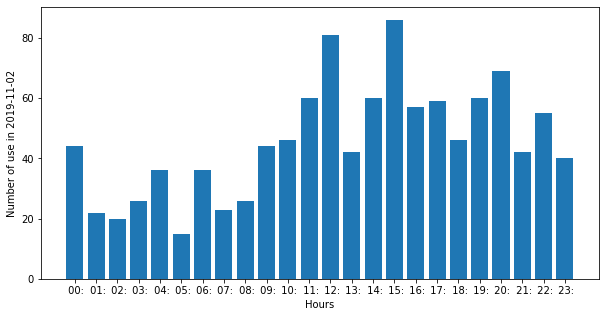

In [18]:
import matplotlib.pyplot as plt

print(result)
result_used = list()
result_distance = list()

for res in result:
    result_used.append(res.get("used"))
    result_distance.append(res.get("distance"))
    

x = hours
y = result_used
plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.ylabel("Number of use in 2019-11-02")
plt.xlabel("Hours")
plt.title("")
#plt.xticks(np.arange(len(days)), [day[5:] for day in days])
plt.show()

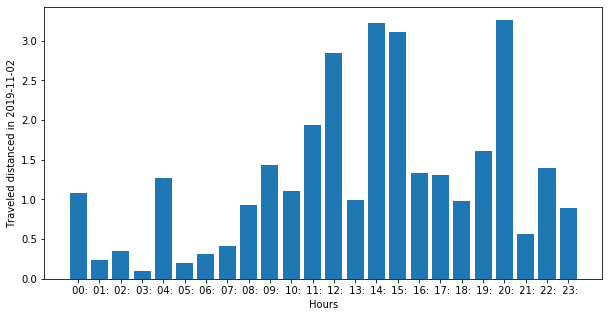

In [19]:
x = hours
y = result_distance
plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.ylabel("Traveled distanced in 2019-11-02")
plt.xlabel("Hours")
plt.title("")
#plt.xticks(np.arange(len(days)), [day[5:] for day in days])
plt.show()